IMPORTING THE NECESSARY PACKAGES LIKE PANDAS, NUMPY, MATPLOTLIB, SEABORN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

READING THE DATASET USING 'read_csv' OF PANDAS BY PROVIDING THE FILEPATH OF THE LOCATION OF DATASET

In [2]:
df=pd.read_csv("E:\\DEEPIKA\\Finlatics\\DsResearch\\DsResearch\\Media and Technology\\Media and Technology\\Global YouTube Statistics.csv",encoding='Latin-1')
print(df)

      rank                    Youtuber  subscribers   video views  \
0        1                    T-Series  245000000.0  2.280000e+11   
1        2              YouTube Movies  170000000.0  0.000000e+00   
2        3                     MrBeast  166000000.0  2.836884e+10   
3        4  Cocomelon - Nursery Rhymes  162000000.0  1.640000e+11   
4        5                   SET India  159000000.0  1.480000e+11   
...    ...                         ...          ...           ...   
1001   779                    The Dodo   14200000.0  9.964117e+09   
1002   787            Supercar Blondie   14100000.0  5.405563e+09   
1003   871        Just For Laughs Gags   13300000.0  7.406629e+09   
1004   872            Kabita's Kitchen   13300000.0  2.831276e+09   
1005   873                  BanderitaX   13300000.0  4.129249e+09   

              category                       Title  uploads  \
0                Music                    T-Series    20082   
1     Film & Animation               youtubem

# PRE-PROCESSING OF DATA SET

PRE-PROCESSING OF DATASET IS DONE TO FILL ALL THE MISSING VALUES

THIS FUNCTION IS USED TO CHECK THE COUNT OF MISSING VALUES IN EACH COLUMN

In [3]:
print(df.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  3
video views                                  0
category                                    55
Title                                        0
uploads                                      0
Country of origin                          125
Country                                    125
Abbreviation                               125
channel_type                                32
video_views_rank                             1
country_rank                               119
channel_type_rank                           35
video_views_for_the_last_30_days            57
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               340
created_year                                 5
created_month

DROPPING THE COLUMNS COUNTRY AND ABBREVATION SINCE IT IS NOT REQUIRED MUCH

In [4]:
df.drop(columns=['Country','Abbreviation'],inplace=True)


GETTING THE COUNT VALUES OF COUNTRY TO FIND THE HIGHEST COUNT AND USING THEM TO FILL THE NULL VALUES

In [5]:
print(df['Country of origin'].isnull().value_counts())
print(df['Country of origin'].value_counts())

Country of origin
False    881
True     125
Name: count, dtype: int64
Country of origin
United States           315
India                   170
Brazil                   62
United Kingdom           44
Mexico                   33
Indonesia                28
Spain                    22
Thailand                 18
South Korea              17
Russia                   16
Canada                   15
Argentina                13
Philippines              12
Colombia                 11
Saudi Arabia             10
Australia                 9
United Arab Emirates      8
Ukraine                   8
Germany                   6
Pakistan                  6
France                    5
Japan                     5
Turkey                    4
Singapore                 4
Sweden                    4
Vietnam                   3
Jordan                    3
Netherlands               3
Chile                     3
Egypt                     2
Ecuador                   2
Iraq                      2
Italy           

In [6]:
missing_indices=df[df['Country of origin'].isna()].index
print(missing_indices)
loc1=df.loc[missing_indices[:44],'Country of origin']='India'
print(missing_indices)
loc2=df.loc[missing_indices[44:125],'Country of origin']='United States'


Index([   5,   12,   14,   38,   48,   51,   57,   62,   74,   75,
       ...
        939,  951,  958,  967,  972,  985,  986,  996,  997, 1001],
      dtype='int64', length=125)
Index([   5,   12,   14,   38,   48,   51,   57,   62,   74,   75,
       ...
        939,  951,  958,  967,  972,  985,  986,  996,  997, 1001],
      dtype='int64', length=125)


USING THE AVERAGE OF THE FOLLOWING PARAMETERS TO FILL NULL VALUES

In [8]:
df['Latitude'] = df.groupby('Country of origin')['Latitude'].transform(lambda x: x.fillna(x.mean()))
df['Longitude'] = df.groupby('Country of origin')['Longitude'].transform(lambda x: x.fillna(x.mean()))
df['Unemployment rate'] = df.groupby('Country of origin')['Unemployment rate'].transform(lambda x: x.fillna(x.mean()))
df['Gross tertiary education enrollment (%)'] = df.groupby('Country of origin')['Gross tertiary education enrollment (%)'].transform(lambda x: x.fillna(x.mean()))
df['Population'] = df.groupby('Country of origin')['Population'].transform(lambda x: x.fillna(x.mean()))
df['Urban_population'] = df.groupby('Country of origin')['Urban_population'].transform(lambda x: x.fillna(x.mean()))


In [12]:
drop_extra=df.dropna(subset=['Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],inplace=True)
print(df.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  3
video views                                  0
category                                    54
Title                                        0
uploads                                      0
Country of origin                            0
channel_type                                32
video_views_rank                             0
country_rank                               118
channel_type_rank                           34
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               338
created_year                                 0
created_month                                0
created_date                                 0
Gross tertiar

In [13]:
drop_video_views_rank=df.dropna(subset=['video_views_rank'],inplace=True)
print(df.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  3
video views                                  0
category                                    54
Title                                        0
uploads                                      0
Country of origin                            0
channel_type                                32
video_views_rank                             0
country_rank                               118
channel_type_rank                           34
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               338
created_year                                 0
created_month                                0
created_date                                 0
Gross tertiar

REPLACING THE MODE VALUES FOR DATE, MONTH AND YEAR FOR NULL VALUES

In [14]:
mode_created_date = df['created_date'].mode()[0] if not df['created_date'].mode().empty else None
print(mode_created_date)
df['created_date'] = df['created_date'].fillna(mode_created_date)

mode_created_month = df['created_month'].mode()[0] if not df['created_month'].mode().empty else None
print(mode_created_month)
df['created_month'] = df['created_month'].fillna(mode_created_month)

mode_created_year = df['created_year'].mode()[0] if not df['created_year'].mode().empty else None
print(mode_created_year)
df['created_year'] = df['created_year'].fillna(mode_created_year)

9.0
Jan
2014.0


In [15]:
print(df.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  3
video views                                  0
category                                    54
Title                                        0
uploads                                      0
Country of origin                            0
channel_type                                32
video_views_rank                             0
country_rank                               118
channel_type_rank                           34
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               338
created_year                                 0
created_month                                0
created_date                                 0
Gross tertiar

REPLACING SUBSCRIBERS MISSING VALUE WITH THE NUMBER OF SUBSCRIBERS IN AND AROUND THE MISSING RANGE BASED ON RANK

In [16]:
missing_subscribers = df[df['subscribers'].isnull()].index
print(missing_subscribers)

Index([978, 979, 980], dtype='int64')


In [17]:
print(df['subscribers'].iloc[975:985])
print('\n')
df['subscribers']=df['subscribers'].fillna(12400000)
print(df.isnull().sum())

977    12400000.0
978           NaN
979           NaN
980           NaN
981    12400000.0
982    12400000.0
983    12400000.0
984    12400000.0
985    12400000.0
986    12400000.0
Name: subscribers, dtype: float64


rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    54
Title                                        0
uploads                                      0
Country of origin                            0
channel_type                                32
video_views_rank                             0
country_rank                               118
channel_type_rank                           34
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings         

In [18]:
category_count=df['category'].value_counts()
print(category_count)

category
Entertainment            238
Music                    203
People & Blogs           131
Gaming                    95
Comedy                    70
Education                 46
Film & Animation          45
Howto & Style             39
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    12
Pets & Animals             5
Autos & Vehicles           3
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Travel & Events            1
Name: count, dtype: int64


In [19]:
missing_values=df[df['category'].isna()].index
print(missing_values)
locc1=df.loc[missing_values[:27],'category']='Entertainment'
locc2=df.loc[missing_values[27:54],'category']='Music'

Index([   5,   12,   13,   14,   18,   91,  102,  132,  155,  161,  173,  214,
        255,  256,  261,  312,  319,  332,  355,  360,  424,  445,  452,  495,
        496,  553,  592,  593,  598,  619,  712,  733,  736,  738,  742,  763,
        810,  822,  832,  849,  852,  879,  888,  904,  907,  930,  934,  941,
        950,  957,  971,  992,  996, 1000],
      dtype='int64')


In [20]:
print(df.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country of origin                            0
channel_type                                32
video_views_rank                             0
country_rank                               118
channel_type_rank                           34
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               338
created_year                                 0
created_month                                0
created_date                                 0
Gross tertiar

In [21]:
category_count=df['category'].value_counts()
print(category_count)

category
Entertainment            265
Music                    230
People & Blogs           131
Gaming                    95
Comedy                    70
Education                 46
Film & Animation          45
Howto & Style             39
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    12
Pets & Animals             5
Autos & Vehicles           3
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Travel & Events            1
Name: count, dtype: int64


In [22]:
channel_type_count=df['channel_type'].value_counts()
print(channel_type_count)

channel_type
Entertainment    304
Music            216
People           101
Games            100
Comedy            52
Education         50
Film              42
Howto             37
News              30
Tech              17
Sports            14
Autos              4
Animals            3
Nonprofit          2
Name: count, dtype: int64


In [23]:
missing_channel_type=df[df['channel_type'].isna()].index
print(missing_channel_type)
location1=df.loc[missing_channel_type[:16],'channel_type']='Entertainment'
location2=df.loc[missing_channel_type[16:32],'channel_type']='Music'

Index([  38,   57,  102,  149,  166,  178,  183,  190,  226,  236,  340,  440,
        444,  445,  463,  468,  476,  508,  544,  548,  555,  592,  629,  710,
        778,  784,  853,  904,  951,  969,  997, 1001],
      dtype='int64')


In [24]:
print(df.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country of origin                            0
channel_type                                 0
video_views_rank                             0
country_rank                               118
channel_type_rank                           34
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               338
created_year                                 0
created_month                                0
created_date                                 0
Gross tertiar

MISSING VALUES IS COVERED WITH MEAN, MEDIAN

In [25]:
df['video_views_for_the_last_30_days'] = pd.to_numeric(df['video_views_for_the_last_30_days'])
print(df['video_views_for_the_last_30_days'].dtype)

float64


In [26]:
df['video_views_for_the_last_30_days']=df['video_views_for_the_last_30_days'].fillna(df['video_views_for_the_last_30_days'].mean())
print(df['video_views_for_the_last_30_days'])

0       2.258000e+09
1       1.200000e+01
2       1.348000e+09
3       1.975000e+09
4       1.824000e+09
            ...     
1001    7.208000e+03
1002    3.532590e+08
1003    1.746800e+07
1004    4.311800e+07
1005    7.071200e+07
Name: video_views_for_the_last_30_days, Length: 1004, dtype: float64


In [27]:
df['subscribers_for_last_30_days']=pd.to_numeric(df['subscribers_for_last_30_days'],errors='coerce')
print(df['subscribers_for_last_30_days'].dtype)
print(df['subscribers_for_last_30_days'].mean())

float64
349541.85285285284


In [28]:
df['subscribers_for_last_30_days']=df['subscribers_for_last_30_days'].fillna(df['subscribers_for_last_30_days'].mean())
print(df['subscribers_for_last_30_days'])

0       2.000000e+06
1       3.495419e+05
2       8.000000e+06
3       1.000000e+06
4       1.000000e+06
            ...     
1001    5.000000e+00
1002    5.000000e+05
1003    1.000000e+05
1004    3.495419e+05
1005    2.000000e+05
Name: subscribers_for_last_30_days, Length: 1004, dtype: float64


In [29]:
df['channel_type_rank']=df['channel_type_rank'].fillna(df['channel_type_rank'].median())
df['country_rank']=df['country_rank'].fillna(df['country_rank'].median())

In [30]:
print(df.isnull().sum())

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country of origin                          0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tertiary education enrollment (%)    0
Population

RENAMING AS COUNTRY FOR LEGIBILITY

In [31]:
df.rename(columns={'Country of origin':'Country'},inplace=True)

INFORMATION ABOUT THE DATASET

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1004 entries, 0 to 1005
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     1004 non-null   int64  
 1   Youtuber                                 1004 non-null   object 
 2   subscribers                              1004 non-null   float64
 3   video views                              1004 non-null   float64
 4   category                                 1004 non-null   object 
 5   Title                                    1004 non-null   object 
 6   uploads                                  1004 non-null   int64  
 7   Country                                  1004 non-null   object 
 8   channel_type                             1004 non-null   object 
 9   video_views_rank                         1004 non-null   float64
 10  country_rank                             1004 non-nul

In [33]:
datatype_convert_dictionary={
    'subscribers' : 'int',
    'video_views_rank' : 'int',
    'country_rank' : 'int',
    'channel_type_rank' : 'int',
    'video_views_for_the_last_30_days' : 'int',
    'subscribers_for_last_30_days' : 'int',
    'created_year' : 'int',
    'created_date' : 'int'    
}
df=df.astype(datatype_convert_dictionary)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1004 entries, 0 to 1005
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     1004 non-null   int64  
 1   Youtuber                                 1004 non-null   object 
 2   subscribers                              1004 non-null   int32  
 3   video views                              1004 non-null   float64
 4   category                                 1004 non-null   object 
 5   Title                                    1004 non-null   object 
 6   uploads                                  1004 non-null   int64  
 7   Country                                  1004 non-null   object 
 8   channel_type                             1004 non-null   object 
 9   video_views_rank                         1004 non-null   int32  
 10  country_rank                             1004 non-nul

 EXPLORATORY DATA ANALYSIS

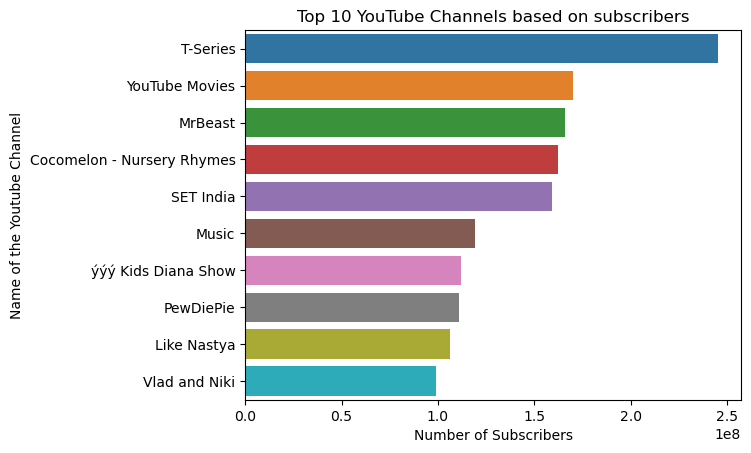

In [34]:
sorted_data=df.sort_values(by='subscribers', ascending=False).head(10)
sns.barplot(x='subscribers', y='Youtuber', data=sorted_data)
plt.xlabel('Number of Subscribers')
plt.ylabel('Name of the Youtube Channel')
plt.title('Top 10 YouTube Channels based on subscribers')
plt.show()

INFERENCE : It is inferred that ‘T-Series’ is having the maximum (250 million) number of subscribers followed by ‘YouTube movies’ and so on. 

                 category   subscribers
0        Autos & Vehicles  1.660000e+07
1                  Comedy  2.002571e+07
2               Education  2.712391e+07
3           Entertainment  2.305698e+07
4        Film & Animation  2.728889e+07
5                  Gaming  2.077263e+07
6           Howto & Style  1.946667e+07
7                  Movies  2.565000e+07
8                   Music  2.495913e+07
9         News & Politics  2.063077e+07
10  Nonprofits & Activism  2.775000e+07
11         People & Blogs  2.053130e+07
12         Pets & Animals  1.732000e+07
13   Science & Technology  1.861765e+07
14                  Shows  4.161538e+07
15                 Sports  3.285000e+07
16               Trailers  3.900000e+07
17        Travel & Events  1.250000e+07


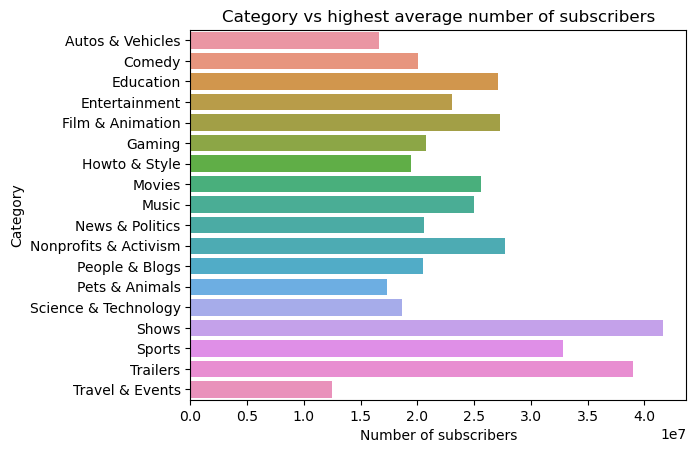

In [35]:
mean_subscribers=df.groupby('category')['subscribers'].mean().reset_index()
print(mean_subscribers)
sns.barplot(x='subscribers', y='category', data=mean_subscribers)
plt.xlabel('Number of subscribers')
plt.ylabel('Category')
plt.title('Category vs highest average number of subscribers')
plt.show()

INFERENCE : It can be inferred that the category ’Shows’ has the highest avg. no. of subscribers . Hence it is obvious that people tend to show more interest in spending their time by watching shows on YouTube. 

We can see that ‘Travel and Events’ have the lowest avg. no. of subscribers. Hence it means that the YouTube watchers hasn’t  shown much interest in Travelling vlogs.


                 category   uploads
0        Autos & Vehicles    1551.0
1                  Comedy    1203.0
2               Education    3087.0
3           Entertainment   10930.0
4        Film & Animation    2862.0
5                  Gaming    4285.0
6           Howto & Style    1735.0
7                  Movies    3553.0
8                   Music    2120.0
9         News & Politics  112484.0
10  Nonprofits & Activism  102912.0
11         People & Blogs    9257.0
12         Pets & Animals    3563.0
13   Science & Technology    2114.0
14                  Shows   27444.0
15                 Sports   19130.0
16               Trailers    6839.0
17        Travel & Events     766.0


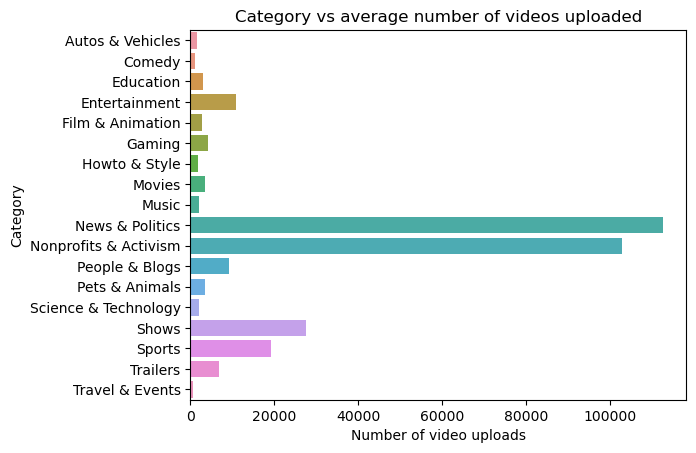

In [36]:
average_videos=df.groupby('category')['uploads'].mean().reset_index()
average_videos['uploads']=round(average_videos['uploads'])
print(average_videos)
sns.barplot(x='uploads', y='category', data=average_videos)
plt.xlabel('Number of video uploads')
plt.ylabel('Category')
plt.title('Category vs average number of videos uploaded')
plt.show()

INFERENCE : ‘News and Politics’ has the most number of videos uploaded. This is because almost all the news channels upload videos regularly on YouTube covering the current affairs in a day.

‘Travel and Events’ have the least no. of videos uploaded.


In [37]:
youtubers_each_country=df.groupby('Country')['Youtuber'].count().reset_index()
print(youtubers_each_country)

                 Country  Youtuber
0            Afghanistan         1
1              Argentina        13
2              Australia         9
3             Bangladesh         1
4               Barbados         1
5                 Brazil        61
6                 Canada        15
7                  Chile         3
8                  China         1
9               Colombia        11
10                  Cuba         1
11               Ecuador         2
12                 Egypt         2
13           El Salvador         1
14               Finland         1
15                France         5
16               Germany         6
17                 India       214
18             Indonesia        28
19                  Iraq         2
20                 Italy         2
21                 Japan         5
22                Jordan         3
23                Kuwait         1
24                Latvia         1
25              Malaysia         1
26                Mexico        33
27               Mor

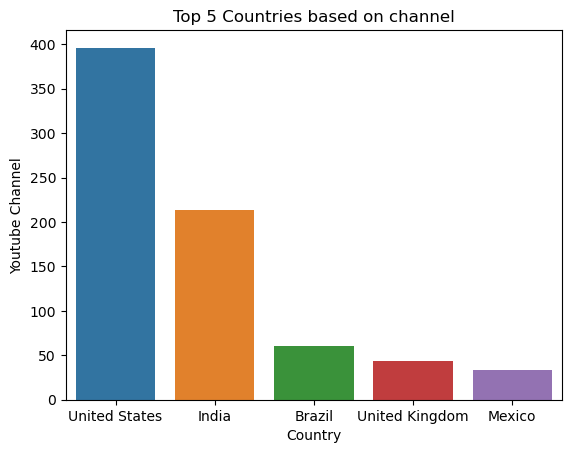

In [38]:
sorted_country=youtubers_each_country.sort_values(by='Youtuber', ascending=False).head(5)
sns.barplot(x='Country', y='Youtuber', data=sorted_country)
plt.xlabel('Country')
plt.ylabel('Youtube Channel')
plt.title('Top 5 Countries based on channel')
plt.show()

INFERENCE : ‘United States’ is the 1st country with the highest number of YouTube channels of nearly 400. Hence we can infer that more people from States are interested in Media and Tech posting videos online. 

This is followed by ‘India’ with more than 200 channels.

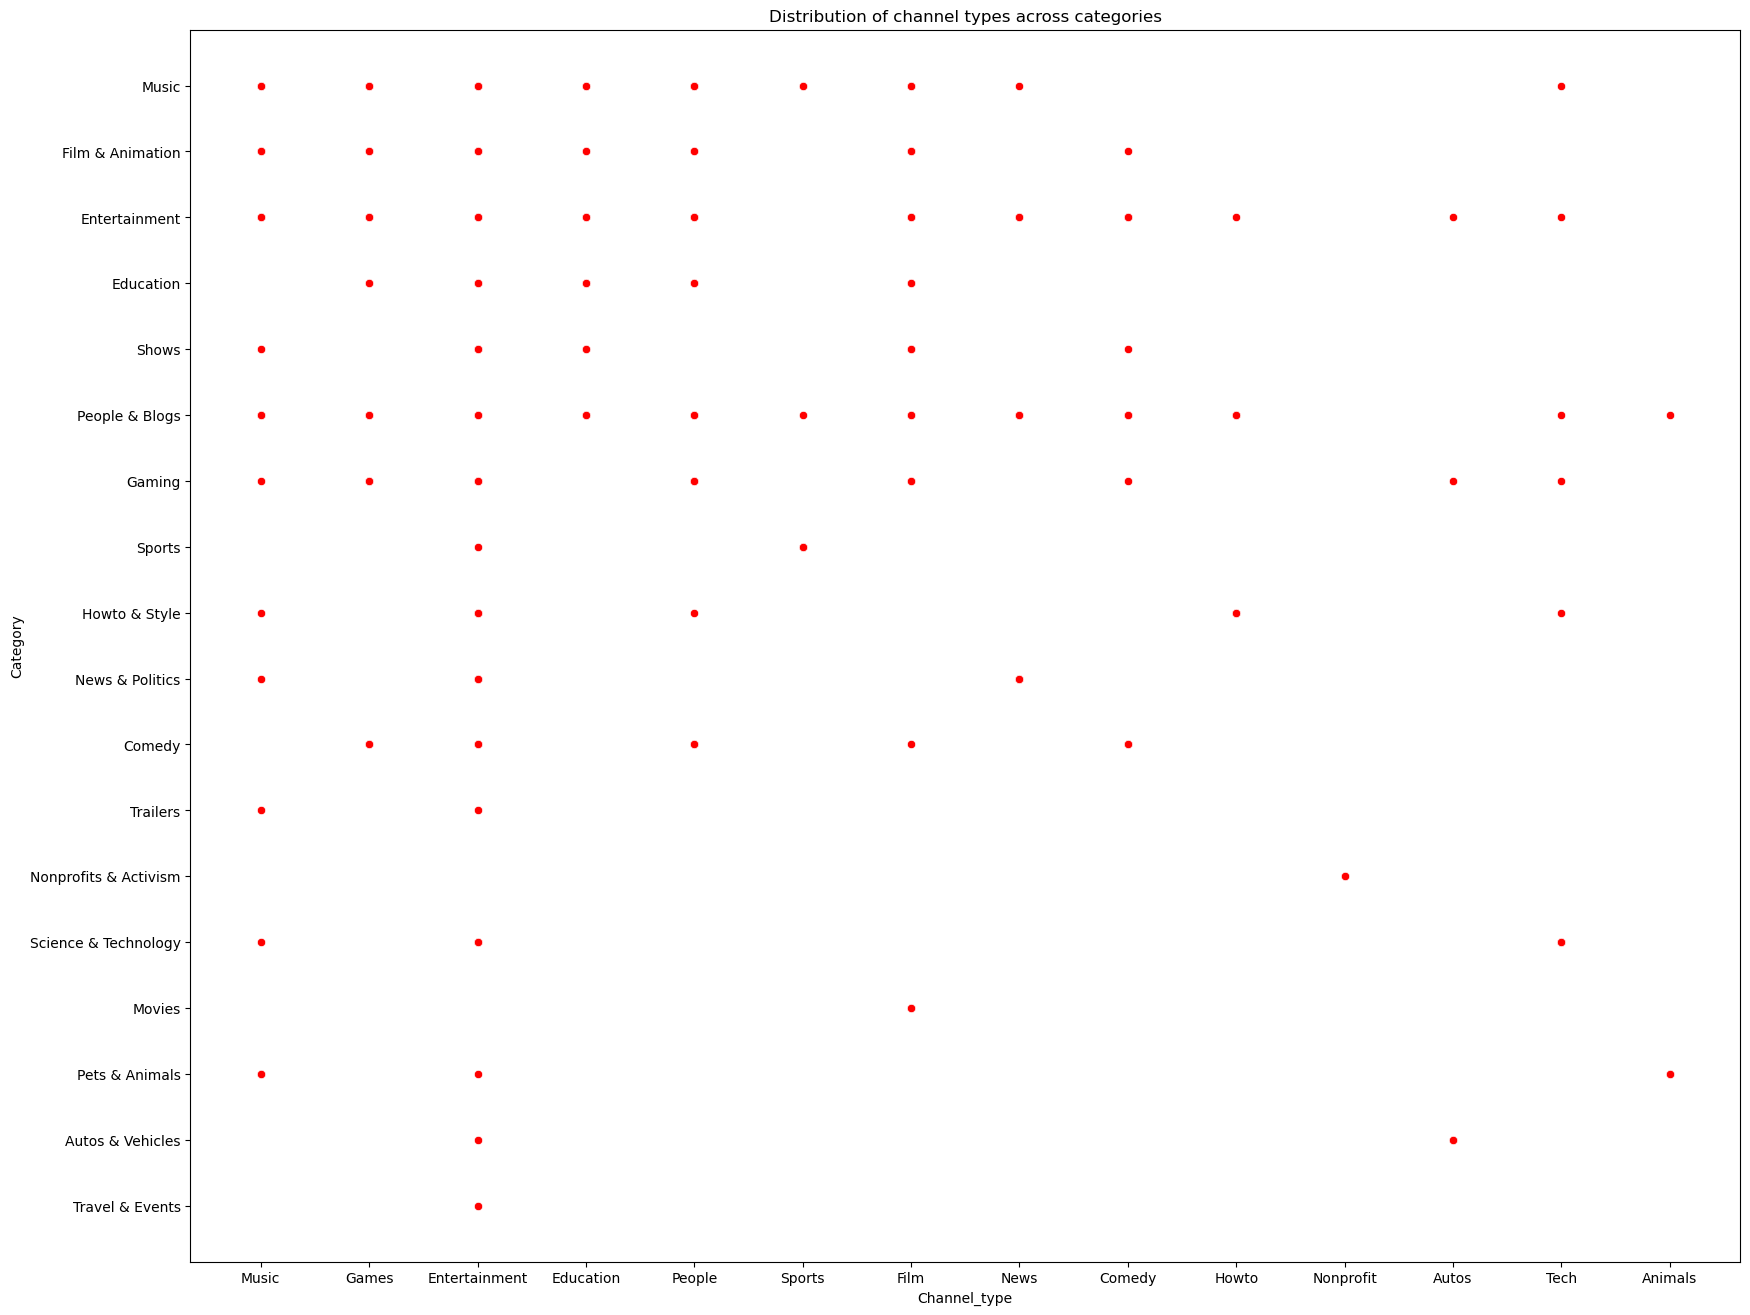

In [39]:
plt.figure(figsize=(20,16))
sns.scatterplot(x='channel_type', y='category', data=df, color='red')
plt.xlabel('Channel_type')
plt.ylabel('Category')
plt.title('Distribution of channel types across categories')
plt.show()

INFERENCE : Scatterplot gives the distribution of channel type across different categories.

0.7481177181059935
There is a correlation of 0.7481177181059935 between the number of subscribers and the video views.


[]

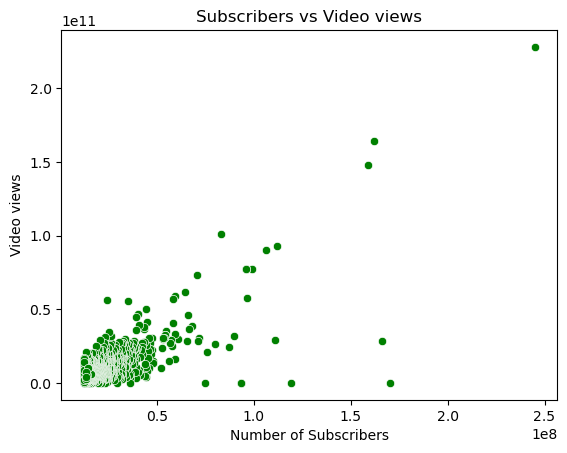

In [40]:
correlation=df['subscribers'].corr(df['video views'])
print(correlation)
print(f'There is a correlation of {correlation} between the number of subscribers and the video views.')
sns.scatterplot(x='subscribers', y='video views', data=df, color='green')
plt.xlabel('Number of Subscribers')
plt.ylabel('Video views')
plt.title('Subscribers vs Video views')
plt.plot()

INFERENCE : It is infered that there is a strong correlation between the number of subscribers for a channel and its video views. 
Channels with more video views have more subscribers since people tend to watch and like the videos of their interest and wants to watch more of it frequently, hence subscribes them.

0       4782300.000
1             0.025
2       2868500.000
3       4196900.000
4       3877950.000
           ...     
1001         15.500
1002     744150.000
1003      37150.000
1004      91650.000
1005     150250.000
Name: average_monthly_earnings, Length: 1004, dtype: float64


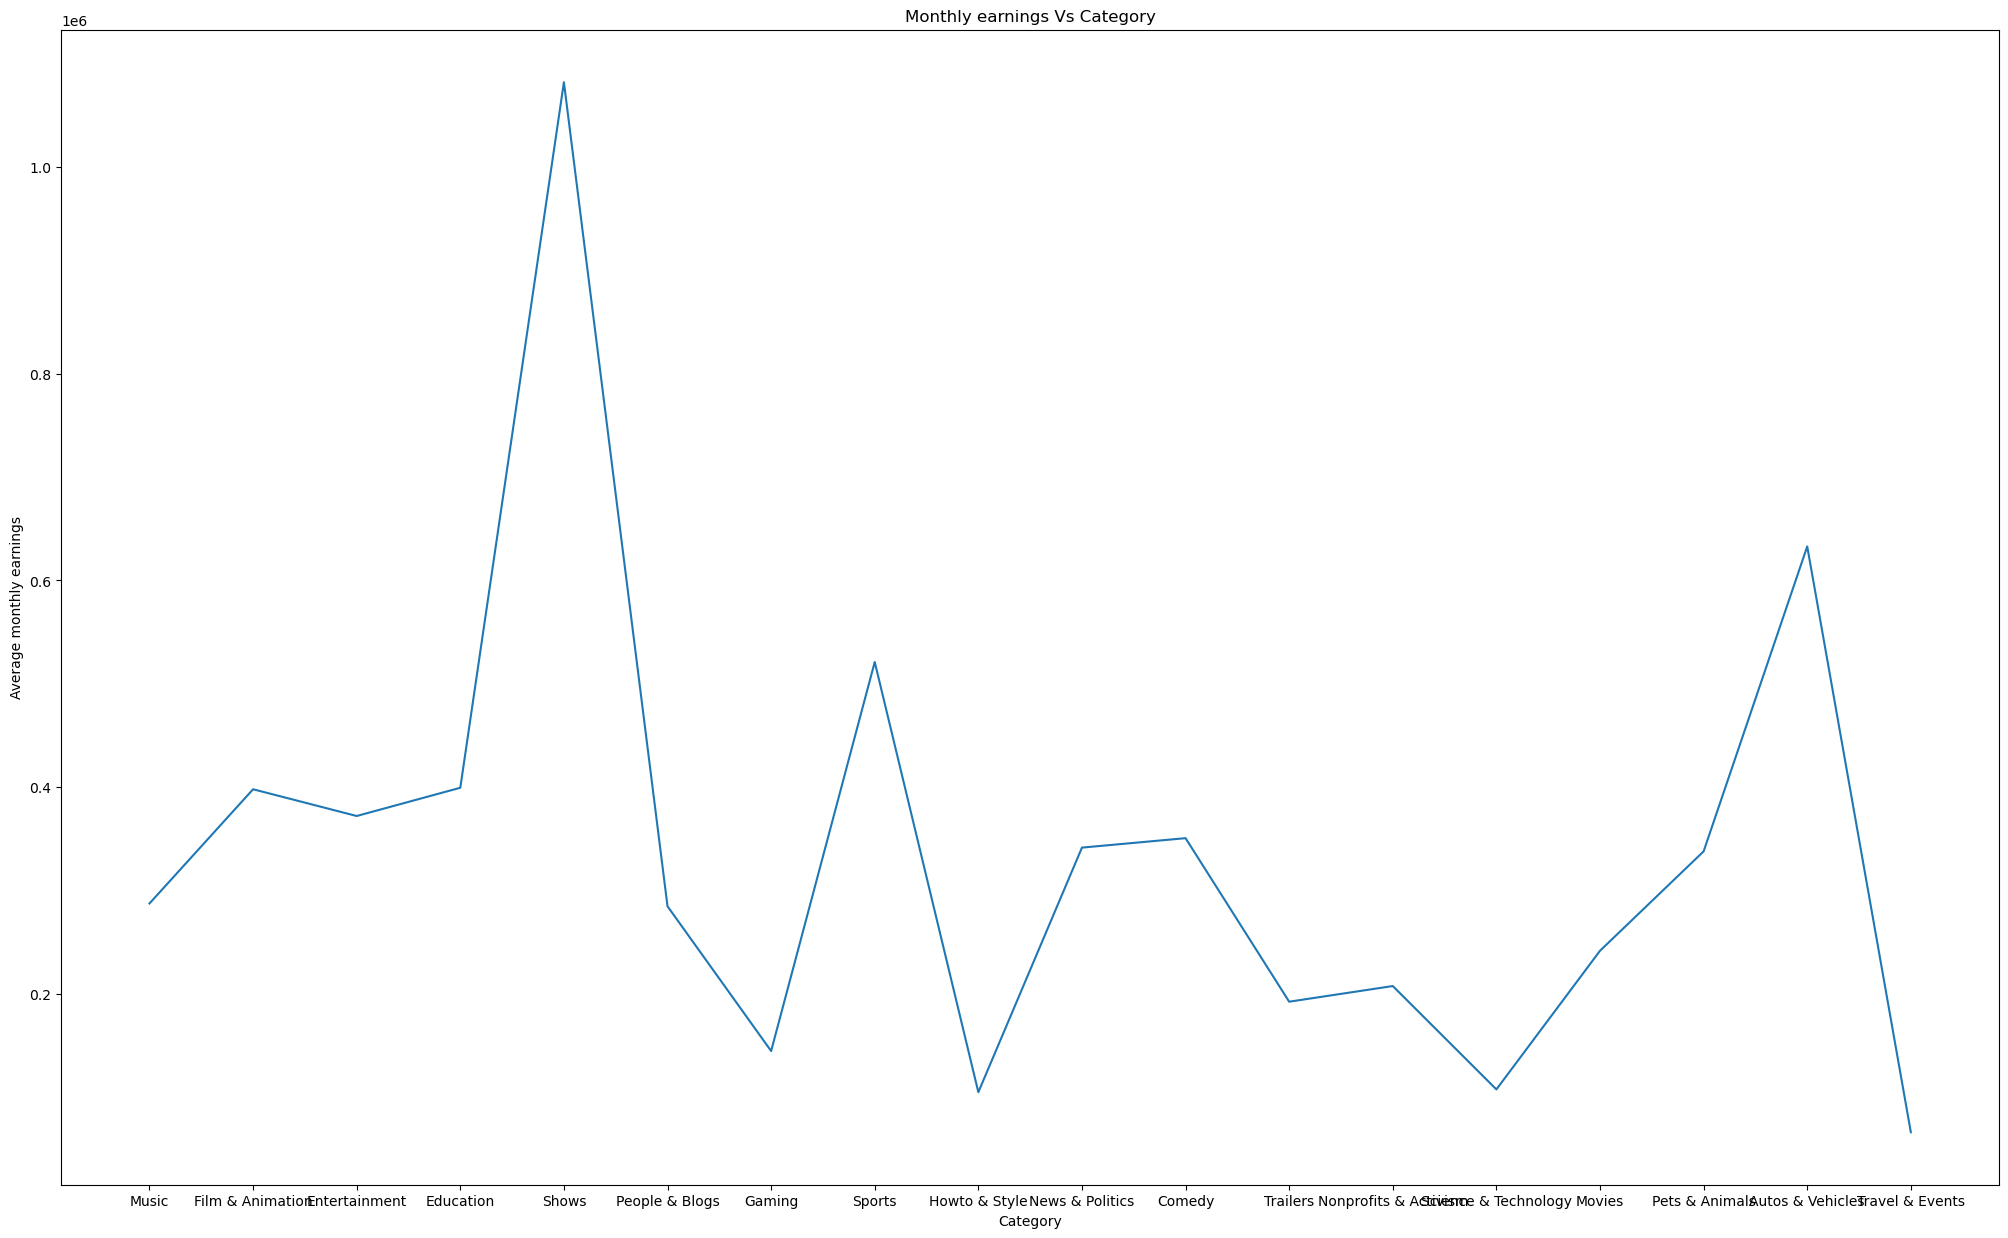

In [41]:
df['average_monthly_earnings']=(df['lowest_monthly_earnings']+df['highest_monthly_earnings'])/2
print(df['average_monthly_earnings'])
plt.figure(figsize=(25,15))
sns.lineplot(x='category', y='average_monthly_earnings', data=df, errorbar=None)
plt.xlabel('Category')
plt.ylabel('Average monthly earnings')
plt.title('Monthly earnings Vs Category')
plt.show()

INFERENCE : It is seen that ‘Shows’ have the highest average number of monthly earnings .(Also inferred that ‘Shows’ has had the highest number of subscribers) And it shows that people like to watch more of ‘Shows’ and had good views count and subscribers that accounted for higher earnings.

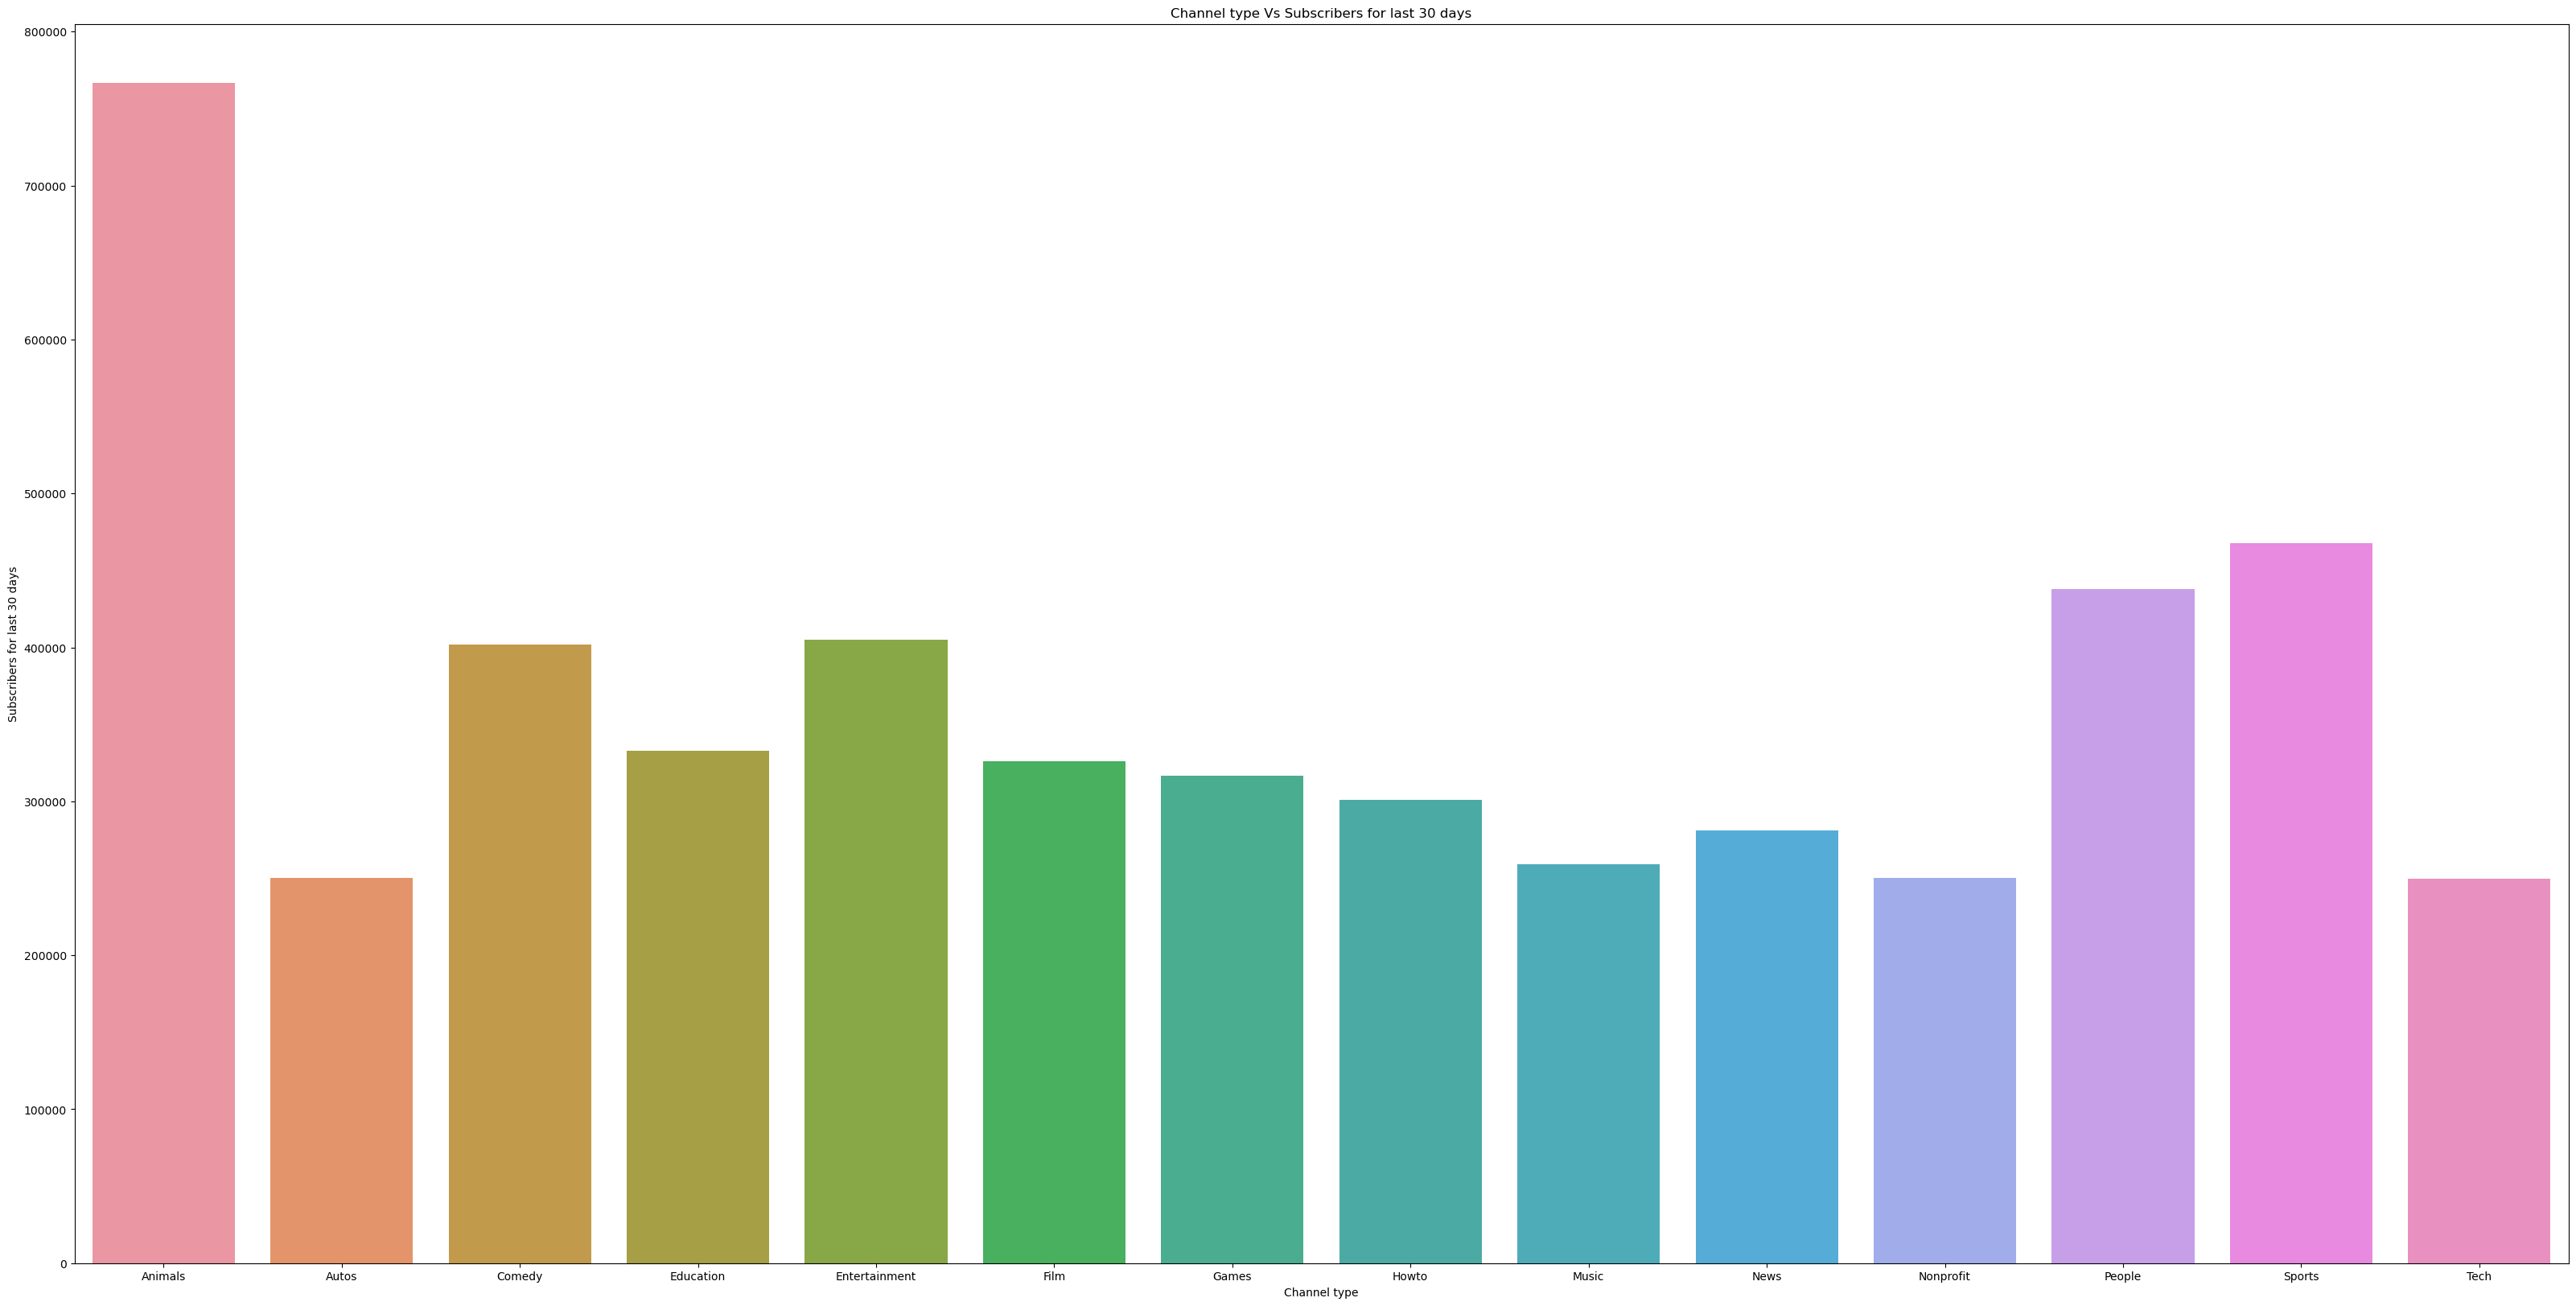

In [42]:
group1=df.groupby('channel_type')['subscribers_for_last_30_days'].mean().reset_index()
plt.figure(figsize=(40,20))
sns.barplot(x='channel_type', y='subscribers_for_last_30_days', data=group1)
plt.xlabel('Channel type')
plt.ylabel('Subscribers for last 30 days')
plt.title('Channel type Vs Subscribers for last 30 days')
plt.show()

INFERENCE : We can infer that the channel type ‘Animals’ has the highest number of subscribers gained for the last 30 days and ‘Autos’ has the lowest number of subscribers gained in the last 30 days.

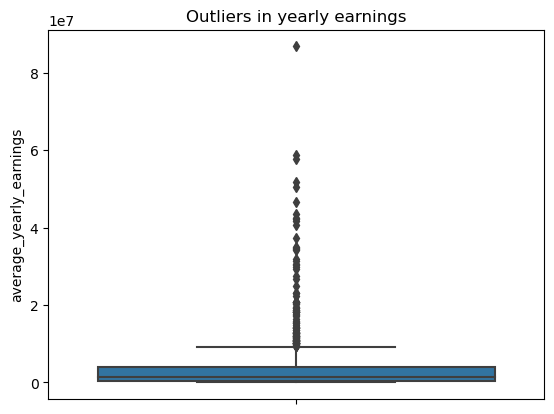

In [43]:
df['average_yearly_earnings']=(df['lowest_yearly_earnings']+df['highest_yearly_earnings'])/2

sns.boxplot(y='average_yearly_earnings',data=df)
plt.title('Outliers in yearly earnings')
plt.show()

INFERENCE : It is inferred that there are many outliers in the average yearly earnings of the YouTube channels.

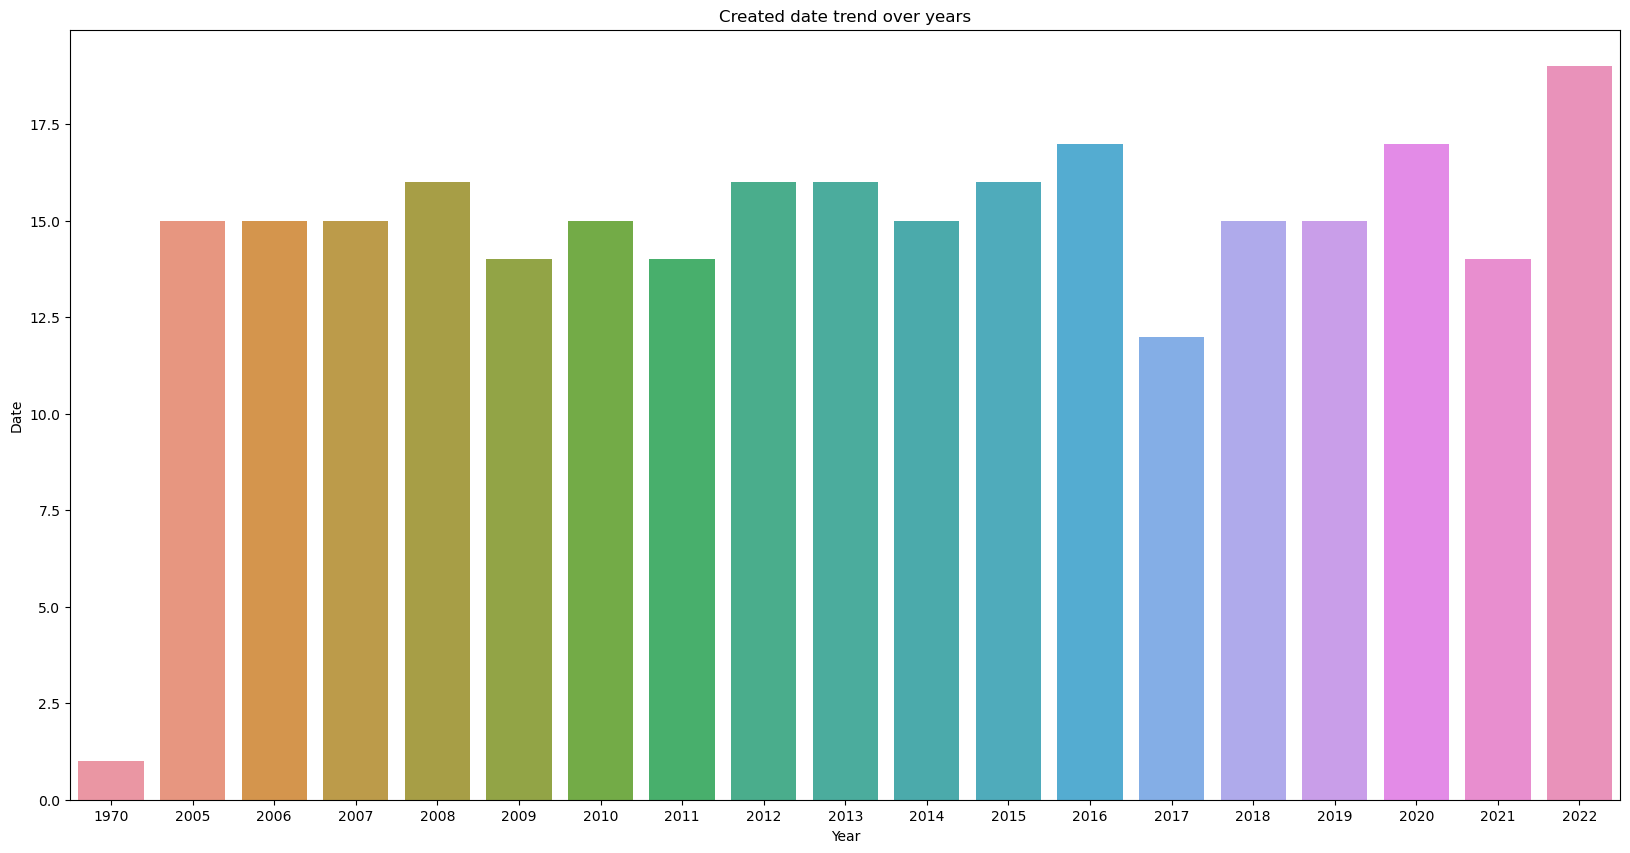

In [44]:

grp=df.groupby('created_year')['created_date'].mean().reset_index()
grp['created_date']=grp['created_date'].astype('int')
grp['created_year']=grp['created_year'].astype('int')


plt.figure(figsize=(20,10))
sns.barplot(x='created_year', y='created_date', data=grp)
plt.xlabel('Year')
plt.ylabel('Date')
plt.title('Created date trend over years')
plt.show()

INFERENCE : It is inferred that many of the channels have been created mostly around the mid of the month.

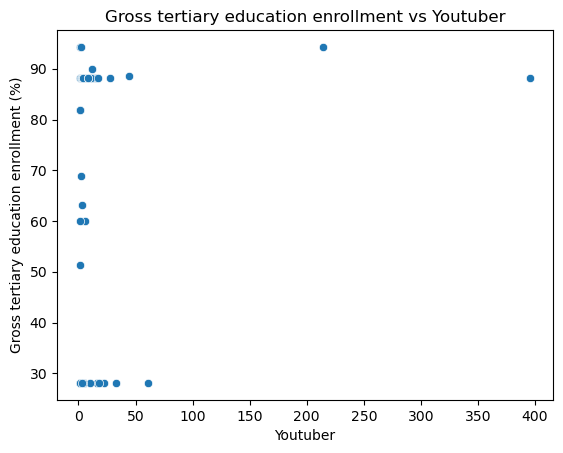

0.20192481614166502


In [45]:
youtubers_each_country=df.groupby('Country')['Youtuber'].count().reset_index()
sns.scatterplot(x=youtubers_each_country['Youtuber'], y=df['Gross tertiary education enrollment (%)'])
plt.title('Gross tertiary education enrollment vs Youtuber')
plt.show()
print(youtubers_each_country['Youtuber'].corr(df['Gross tertiary education enrollment (%)']))

INFERENCE : We can see that there is only less correlation between them. Hence we can infer that there is no fruitful relationship between the two categories and education enrollment percentage doesn’t actually depend on the no. of  YouTube channel in the country.

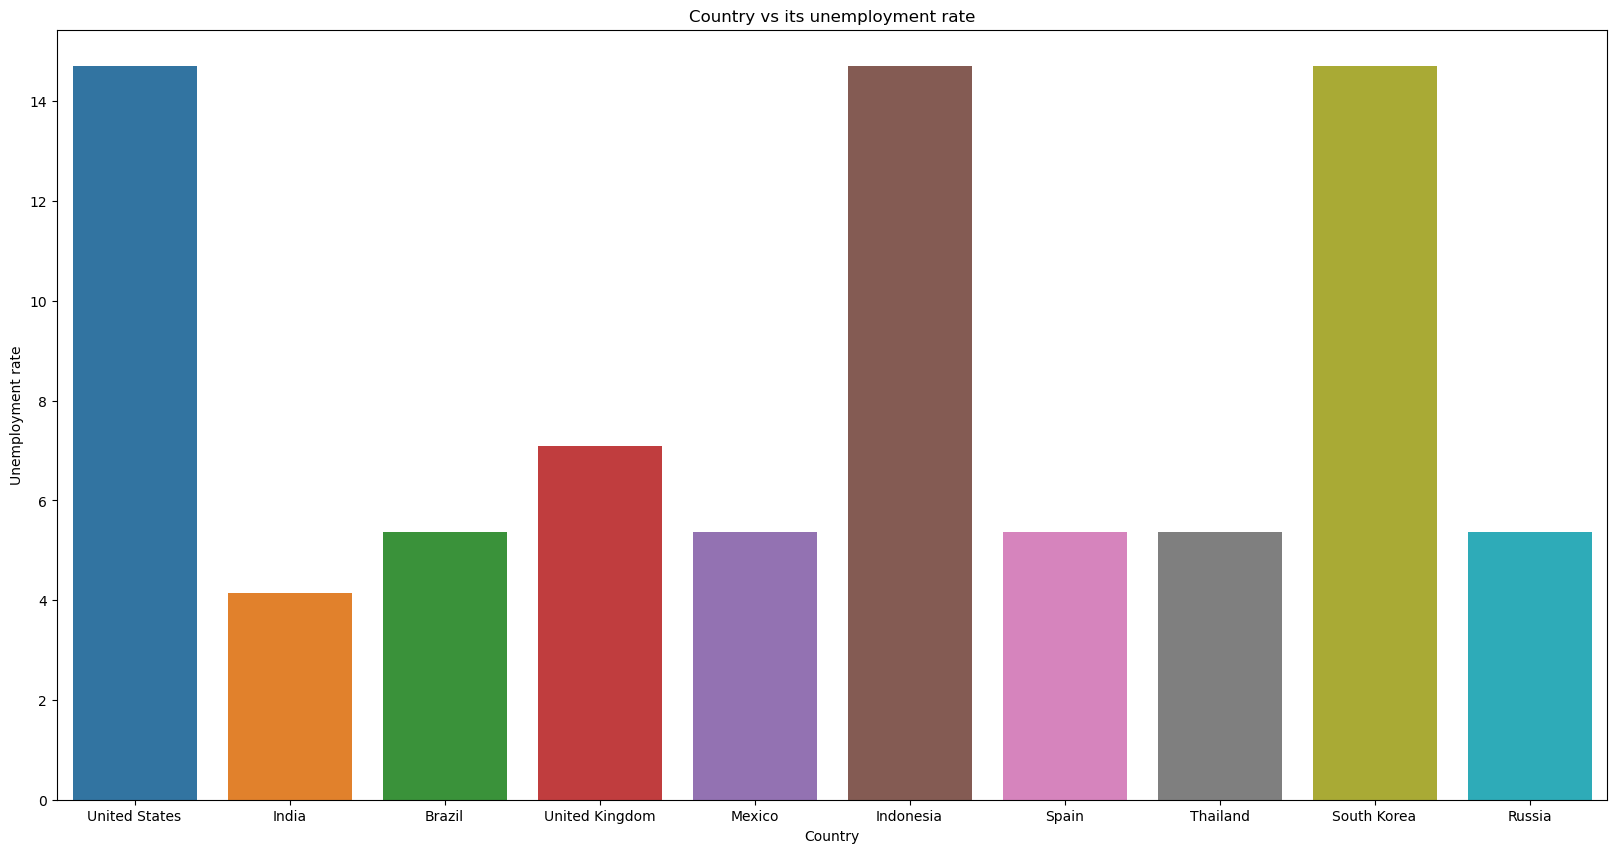

In [46]:
sorted_country2 = youtubers_each_country.sort_values(by='Youtuber', ascending=False).head(10)
plt.figure(figsize=(20,10))
sns.barplot(x=sorted_country2['Country'],y=df['Unemployment rate'])
plt.xlabel('Country')
plt.ylabel('Unemployment rate')
plt.title('Country vs its unemployment rate')
plt.show()

INFERENCE : From this we can infer that ‘United States’, ‘Indonesia’ and ‘South Korea’ have the highest number of unemployment rate.

United States’s highest number of unemployability rates can be one of the reason for its maximum number of YouTube channels.

In [47]:
df['population_percentage']=((df['Urban_population']/df['Population'])*100)

In [48]:
avg_urban_pop=df.groupby('Country')['population_percentage'].mean().reset_index()
print(avg_urban_pop)

                 Country  population_percentage
0            Afghanistan              25.753999
1              Argentina              91.991001
2              Australia              84.779334
3             Bangladesh              36.451564
4               Barbados              31.157913
5                 Brazil              86.207256
6                 Canada              82.797626
7                  Chile              87.643002
8                  China              60.308000
9               Colombia              81.104000
10                  Cuba              77.108996
11               Ecuador              63.985998
12                 Egypt              42.730000
13           El Salvador              72.746005
14               Finland              85.446009
15                France              80.709000
16               Germany              77.376001
17                 India              34.472000
18             Indonesia              56.072364
19                  Iraq              70

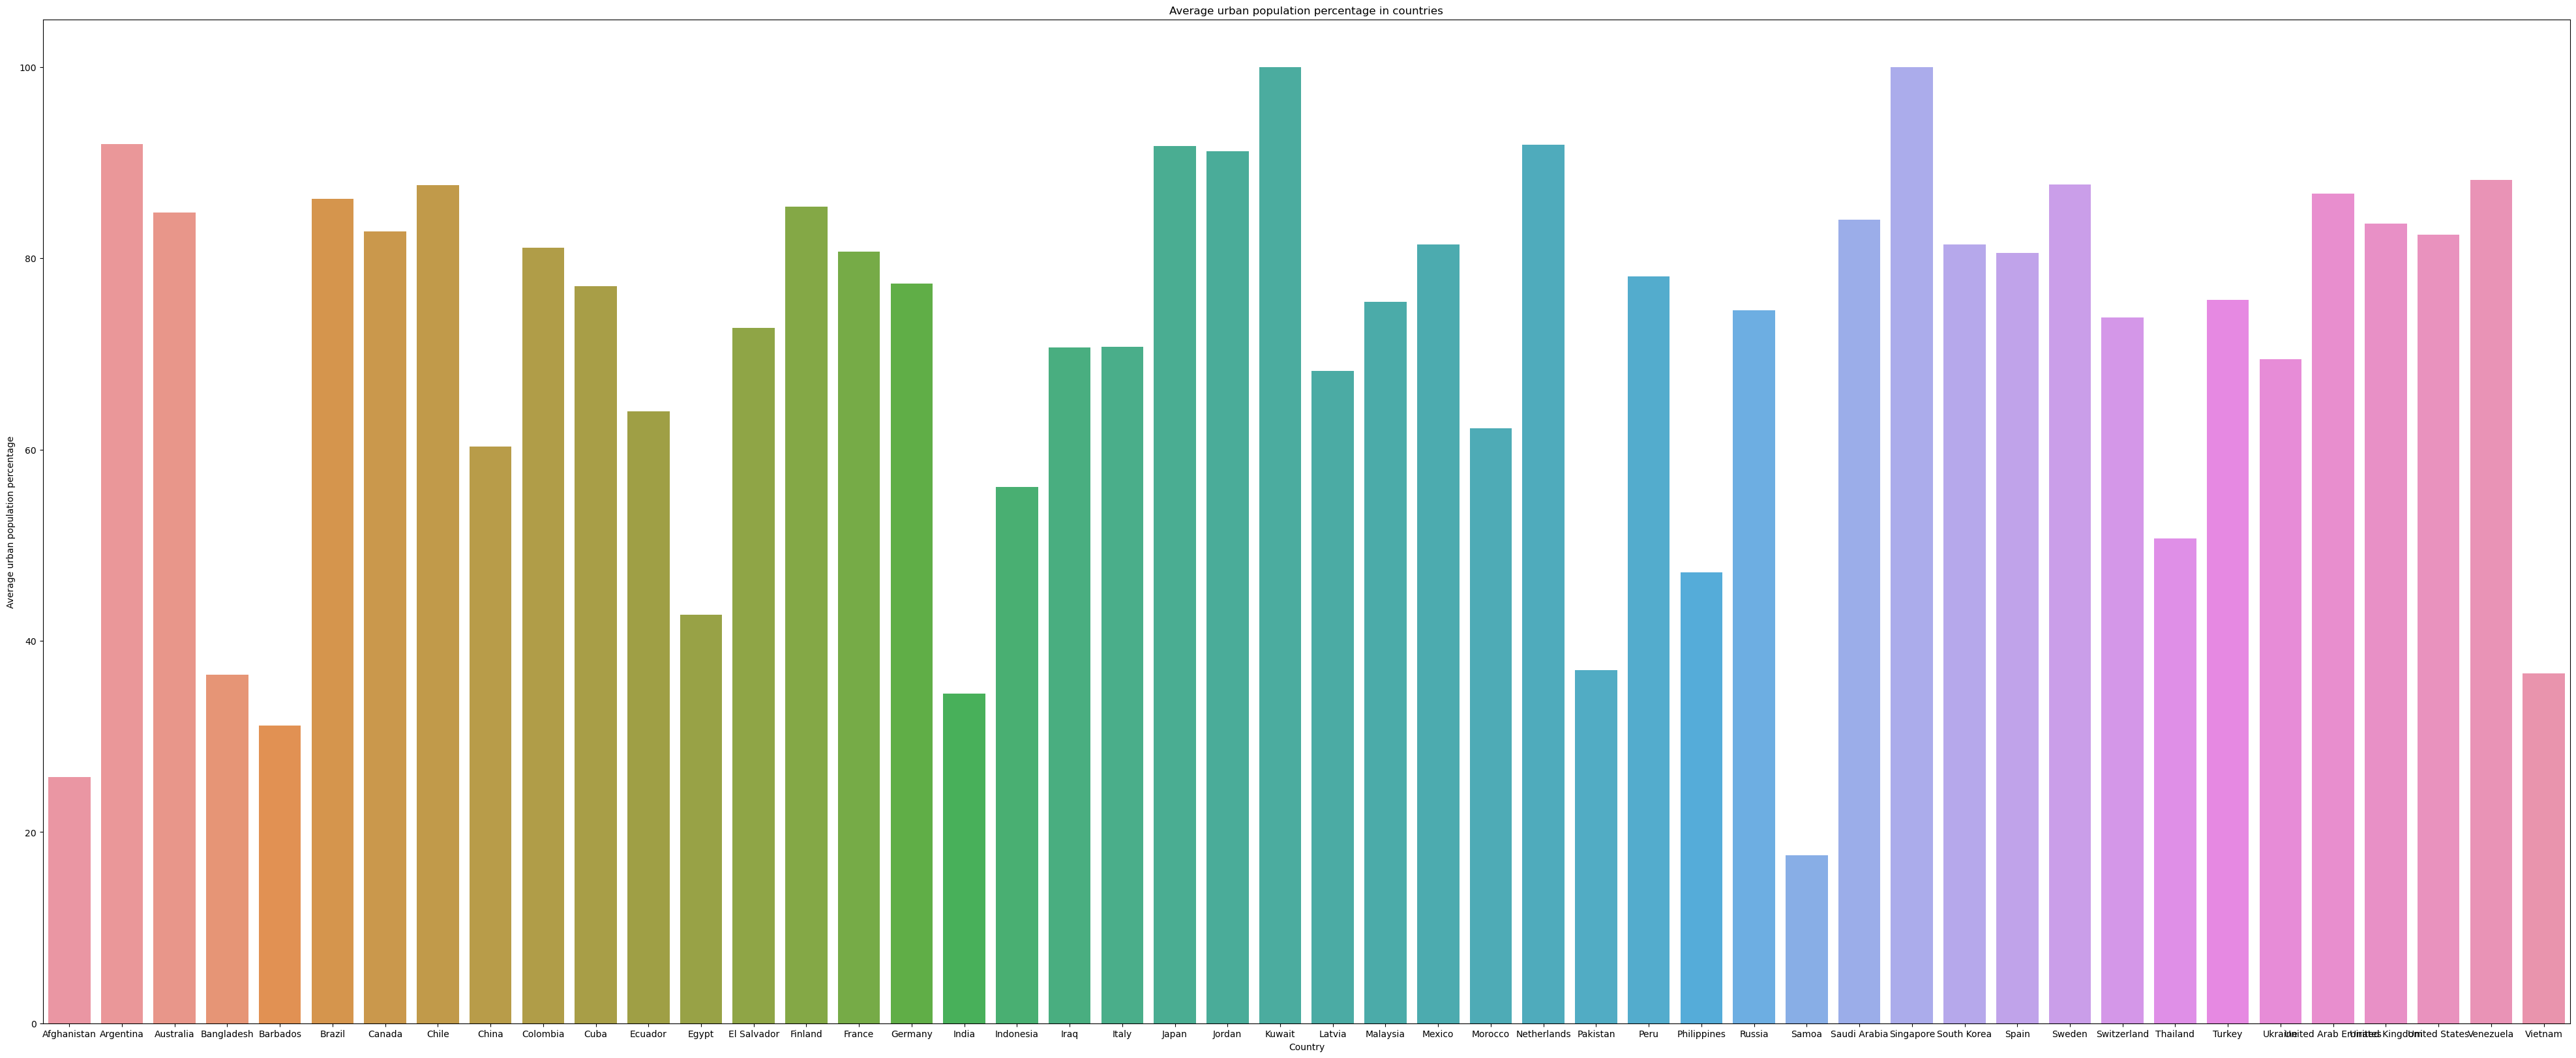

In [49]:
plt.figure(figsize=(50,20))
sns.barplot(x='Country', y='population_percentage', data=avg_urban_pop)
plt.xlabel('Country')
plt.ylabel('Average urban population percentage')
plt.title('Average urban population percentage in countries')
plt.show()

INFERENCE : The average urban population of a country does not hold any good correlation with the YouTube channels in the country.

[]

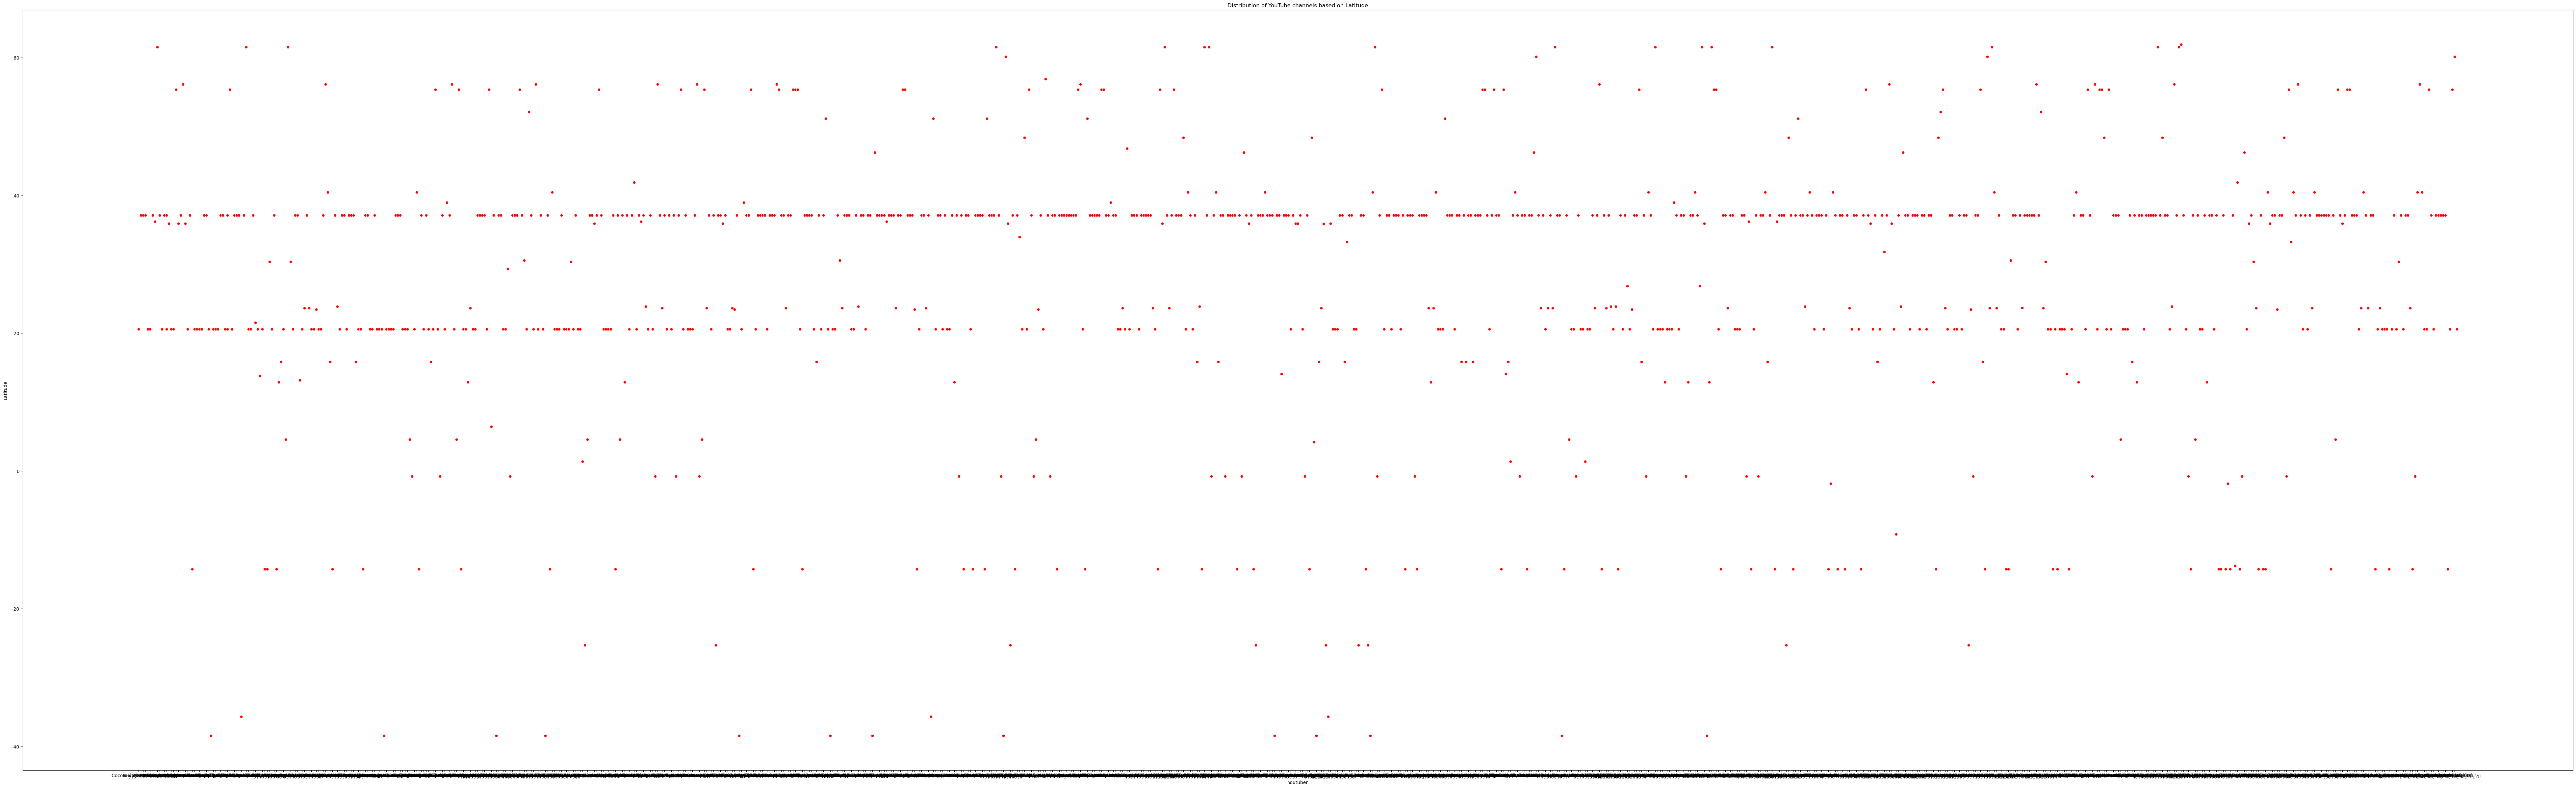

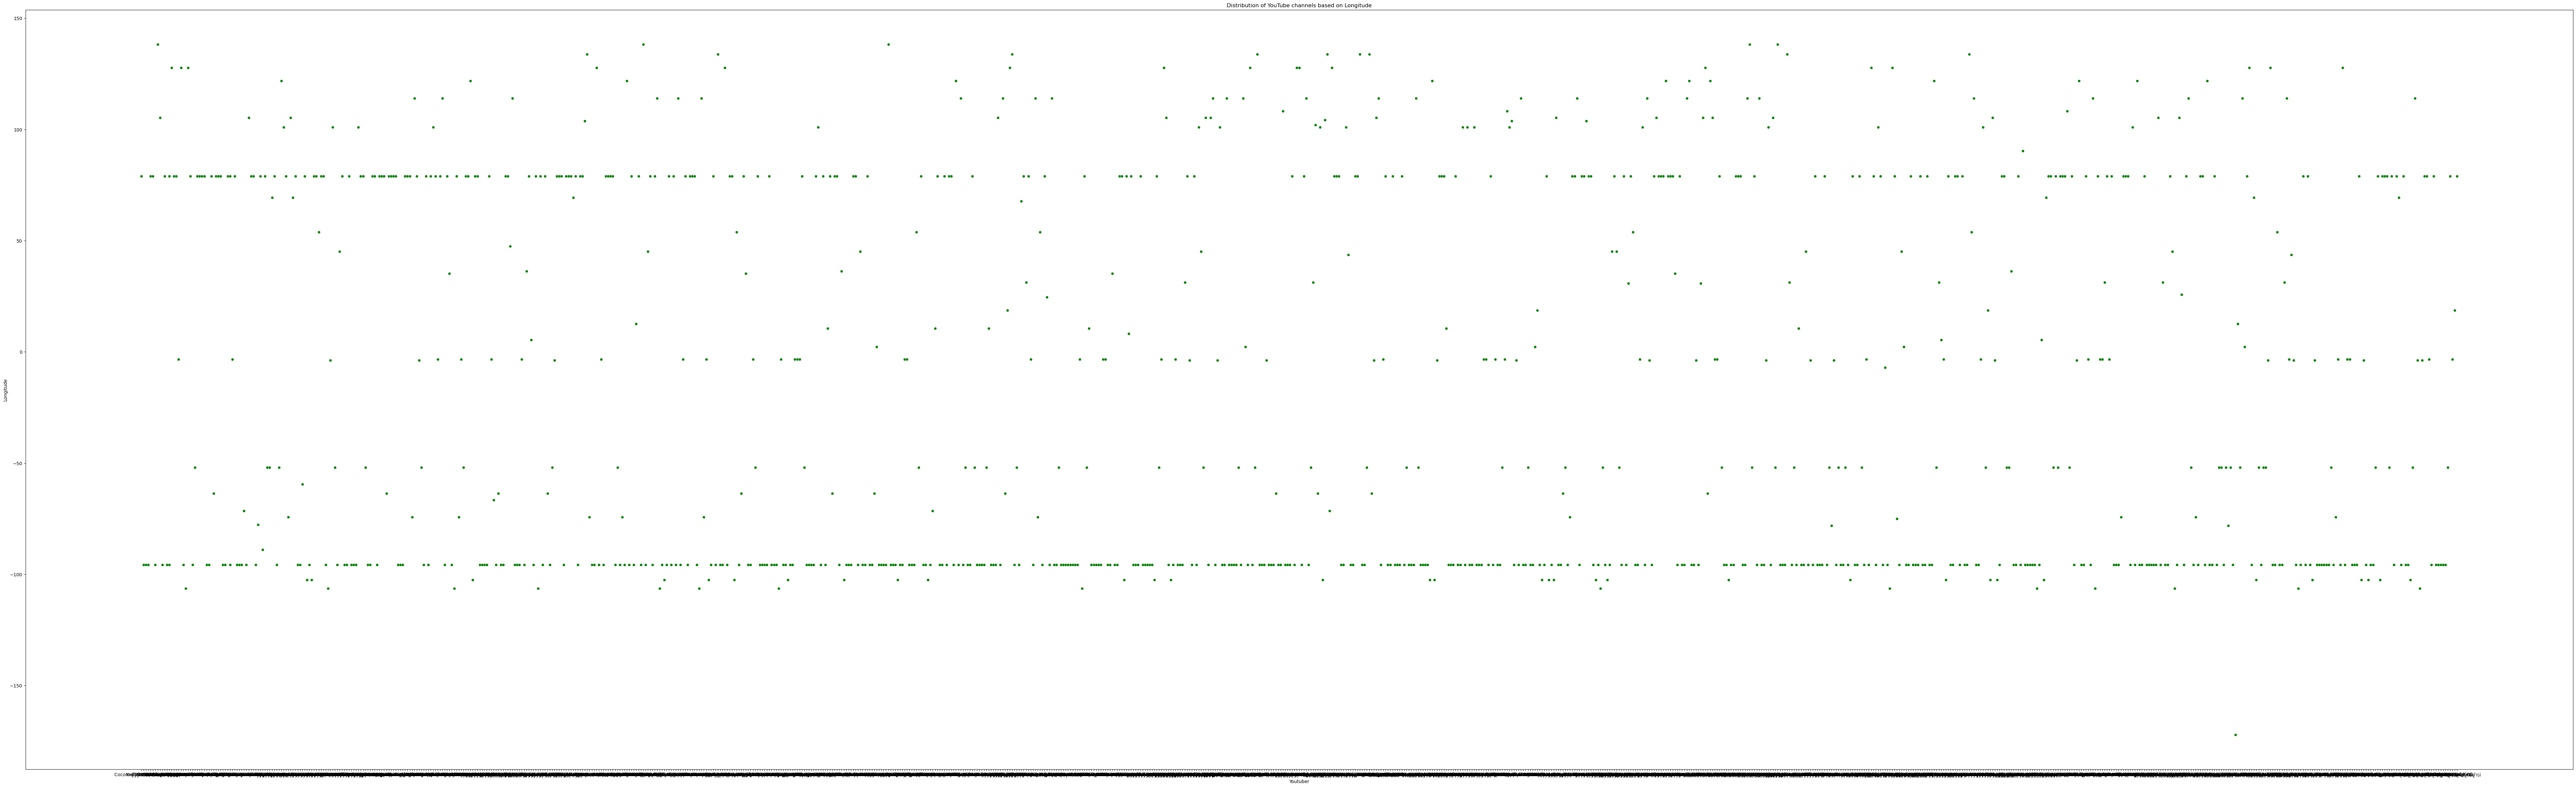

In [50]:
plt.figure(figsize=(100,30))
sns.scatterplot(x='Youtuber', y='Latitude', data=df, color='red')
plt.title('Distribution of YouTube channels based on Latitude')
plt.plot()
print('\n')
plt.figure(figsize=(100,30))
sns.scatterplot(x='Youtuber', y='Longitude', data=df, color='green')
plt.title('Distribution of YouTube channels based on Longitude')
plt.plot()

INFERENCE : The latitude and longitude depends on the country in which the channel originated. 
Hence the two densely scattered lines,  shows the country’s latitude and longitude that has the more YouTube channels (US and India).

In [51]:
subc=df.groupby('Country')['subscribers'].sum().reset_index()
print(subc)
print('\n')
popc=df.groupby('Country')['Population'].sum().reset_index()
print(popc)

                 Country  subscribers
0            Afghanistan     20400000
1              Argentina    328500000
2              Australia    172000000
3             Bangladesh     13900000
4               Barbados     41900000
5                 Brazil   1207300000
6                 Canada    363900000
7                  Chile     87200000
8                  China     17600000
9               Colombia    264500000
10                  Cuba     46300000
11               Ecuador     27700000
12                 Egypt     30600000
13           El Salvador     46100000
14               Finland     13200000
15                France     83900000
16               Germany    116400000
17                 India   5995800000
18             Indonesia    534100000
19                  Iraq     30200000
20                 Italy     39400000
21                 Japan    189100000
22                Jordan     67000000
23                Kuwait     30500000
24                Latvia     20200000
25          

0.8322673963027103


[]

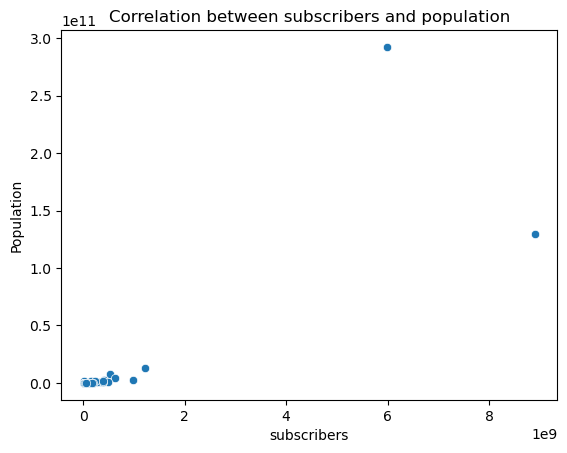

In [52]:
correlation_subscribers_and_population=subc['subscribers'].corr(popc['Population'])
print(correlation_subscribers_and_population)
sns.scatterplot(x=subc['subscribers'], y=popc['Population'])
plt.title('Correlation between subscribers and population')
plt.plot()

INFERENCE : From the plot it is inferred that there is a high correlation between the population and subscribers of the country.
Countries with lesser population have lesser subscribers overall. 

In [53]:
grouping=df.groupby('Country')['Population'].mean().reset_index()
print(grouping)
print('\n')
sort_grouping=grouping.sort_values(by='Population', ascending=False)
print(sort_grouping)

                 Country    Population
0            Afghanistan  3.804175e+07
1              Argentina  4.493871e+07
2              Australia  2.576660e+07
3             Bangladesh  1.673108e+08
4               Barbados  2.870250e+05
5                 Brazil  2.125594e+08
6                 Canada  3.699198e+07
7                  Chile  1.895204e+07
8                  China  1.397715e+09
9               Colombia  5.033944e+07
10                  Cuba  1.133348e+07
11               Ecuador  1.737366e+07
12                 Egypt  1.003881e+08
13           El Salvador  6.453553e+06
14               Finland  5.520314e+06
15                France  6.705989e+07
16               Germany  8.313280e+07
17                 India  1.366418e+09
18             Indonesia  2.702039e+08
19                  Iraq  3.930978e+07
20                 Italy  6.029740e+07
21                 Japan  1.262266e+08
22                Jordan  1.010169e+07
23                Kuwait  4.207083e+06
24                Latvia 

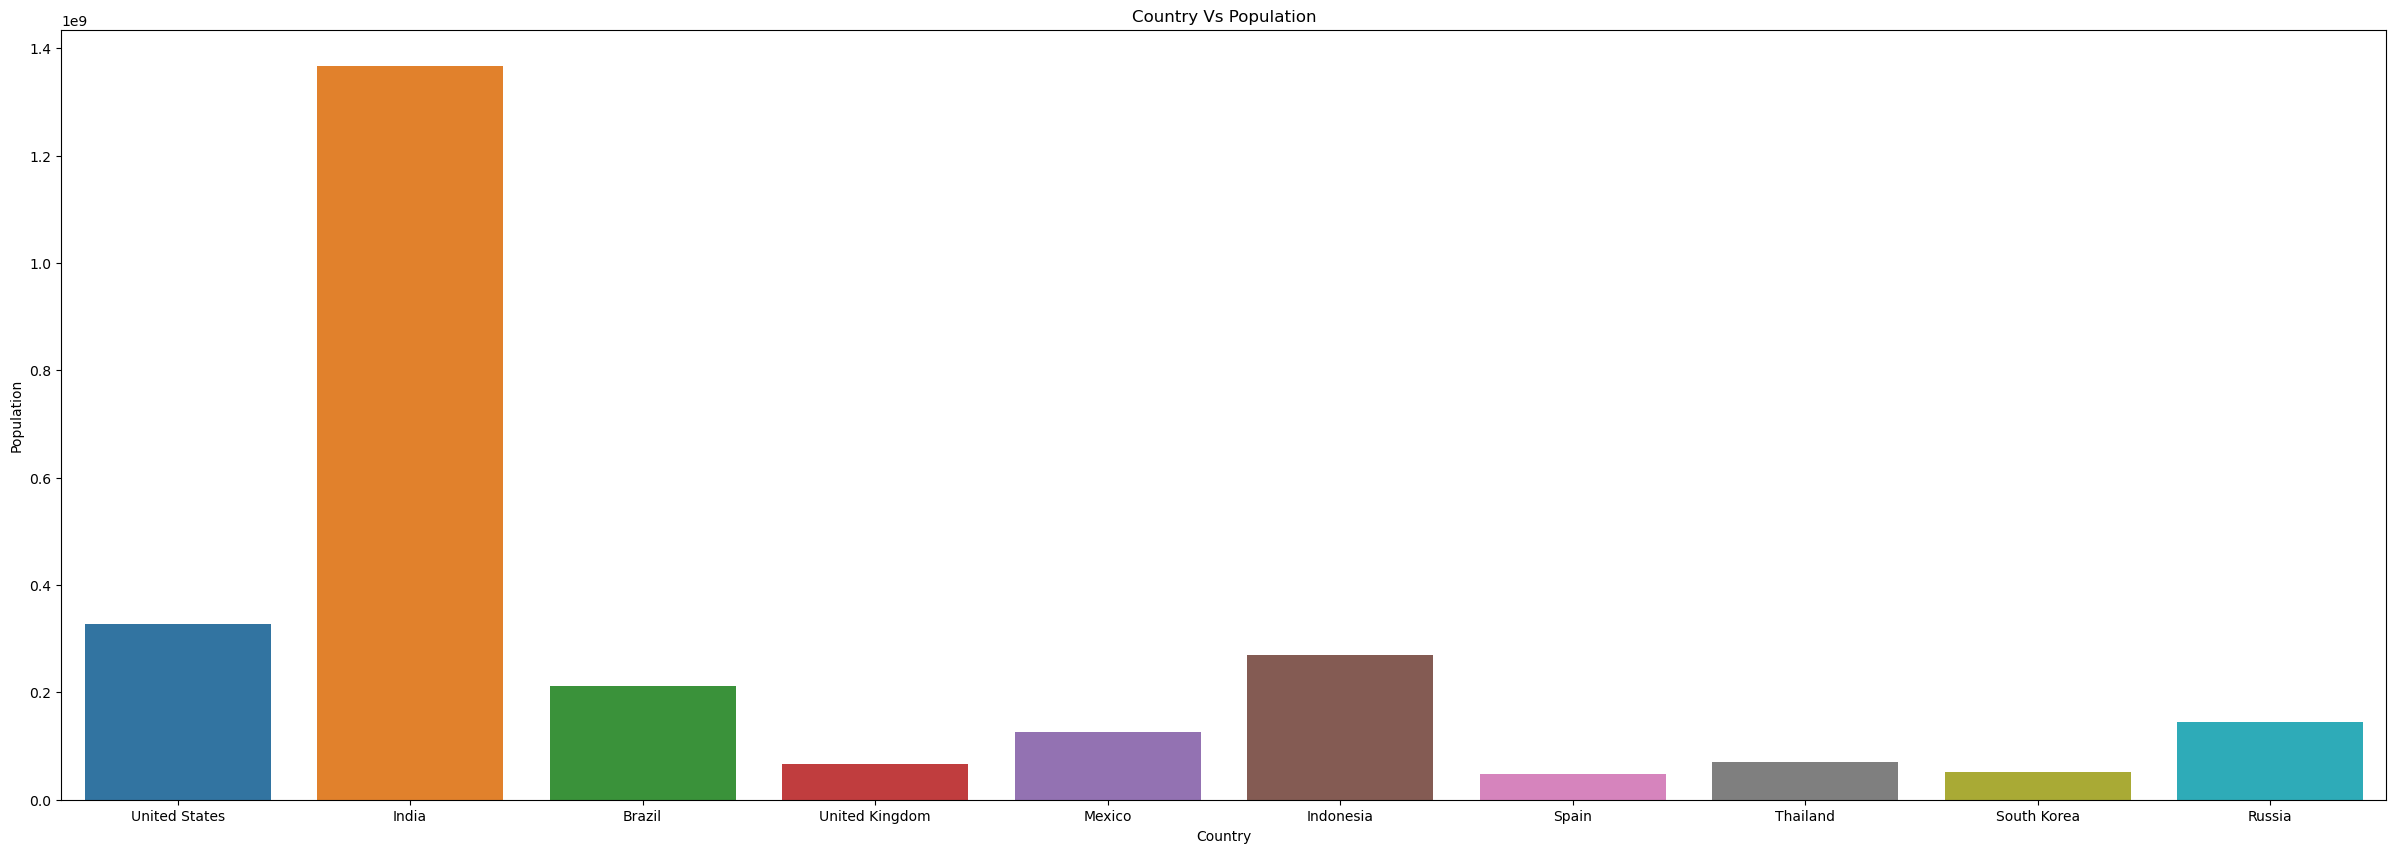

In [54]:
plt.figure(figsize=(30,10))
sns.barplot(x=sorted_country2['Country'], y=grouping['Population'])
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Country Vs Population')
plt.show()

INFERENCE : We can infer that ‘India’(2nd position) has the highest population followed by ‘United States’.
‘Spain’ has the lowest population in this category and is at 7th position for highest number of YouTube channels.

In [55]:
grouping1=df.groupby('Country')['subscribers_for_last_30_days'].mean().reset_index()
print(grouping1)
print('\n')
grouping2=df.groupby('Country')['Unemployment rate'].mean().reset_index()
print(grouping2)

                 Country  subscribers_for_last_30_days
0            Afghanistan                  1.200000e+01
1              Argentina                  4.768525e+05
2              Australia                  3.385320e+05
3             Bangladesh                  3.495410e+05
4               Barbados                  1.000000e+05
5                 Brazil                  2.784778e+05
6                 Canada                  2.530886e+05
7                  Chile                  2.333347e+05
8                  China                  1.000000e+05
9               Colombia                  4.908256e+05
10                  Cuba                  1.000000e+01
11               Ecuador                  2.000000e+05
12                 Egypt                  1.000000e+05
13           El Salvador                  2.000000e+05
14               Finland                  3.495410e+05
15                France                  1.099110e+05
16               Germany                  3.588543e+05
17        

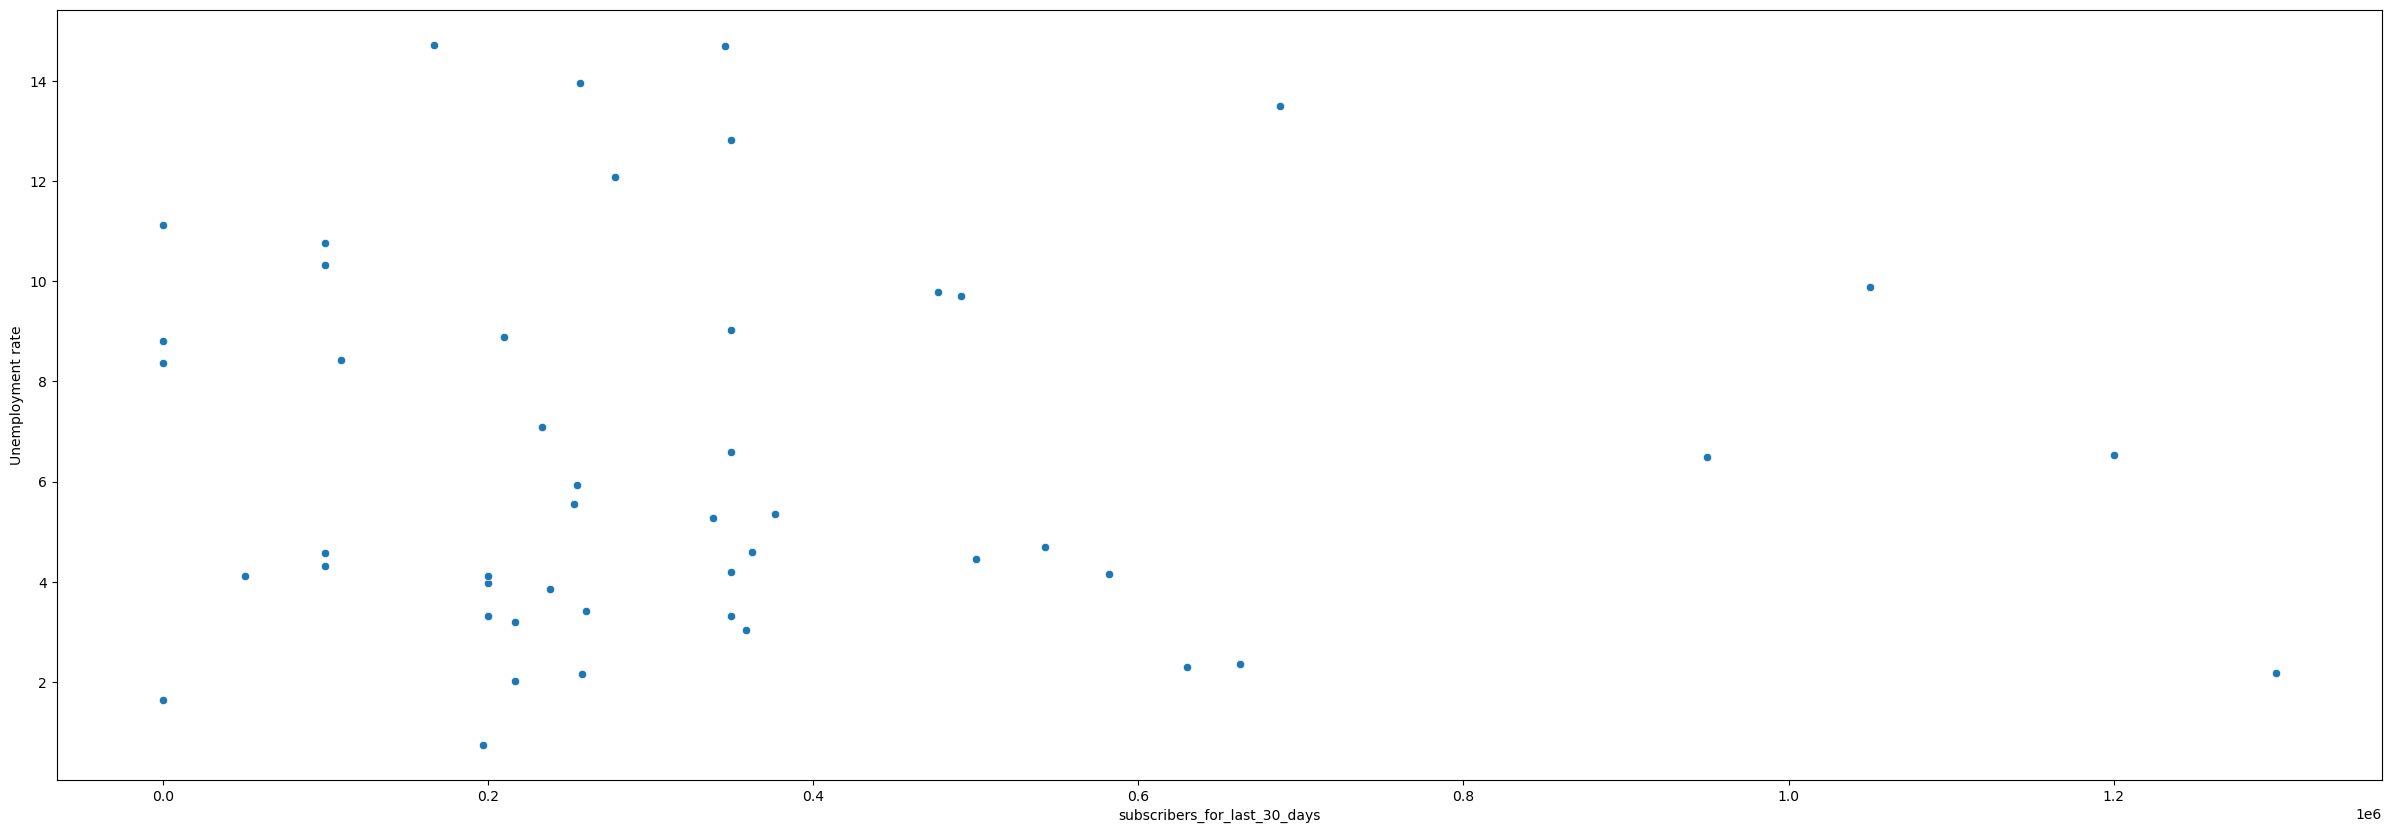

-0.05985126100907705


In [56]:
plt.figure(figsize=(30,10))
sns.scatterplot(x=grouping1['subscribers_for_last_30_days'], y=grouping2['Unemployment rate'])
plt.show()
correlation_of_subs_30_unemployment=grouping1['subscribers_for_last_30_days'].corr(grouping2['Unemployment rate'])
print(correlation_of_subs_30_unemployment)

INFERENCE : These two columns exhibit a weaker correlation and hence we can conclude that there is not much significant relation between the unemployability rate and the subscribers for the last 30 days for the country.

In [57]:
group_channel_type_video_views=df.groupby('channel_type')['video_views_for_the_last_30_days'].mean().reset_index()
print(group_channel_type_video_views)

     channel_type  video_views_for_the_last_30_days
0         Animals                      7.073477e+08
1           Autos                      1.766301e+08
2          Comedy                      1.917458e+08
3       Education                      2.007373e+08
4   Entertainment                      1.532968e+08
5            Film                      1.414243e+08
6           Games                      1.166563e+08
7           Howto                      5.865822e+07
8           Music                      1.177848e+08
9            News                      1.808803e+08
10      Nonprofit                      9.759050e+07
11         People                      1.258863e+08
12         Sports                      2.030792e+08
13           Tech                      5.508947e+07


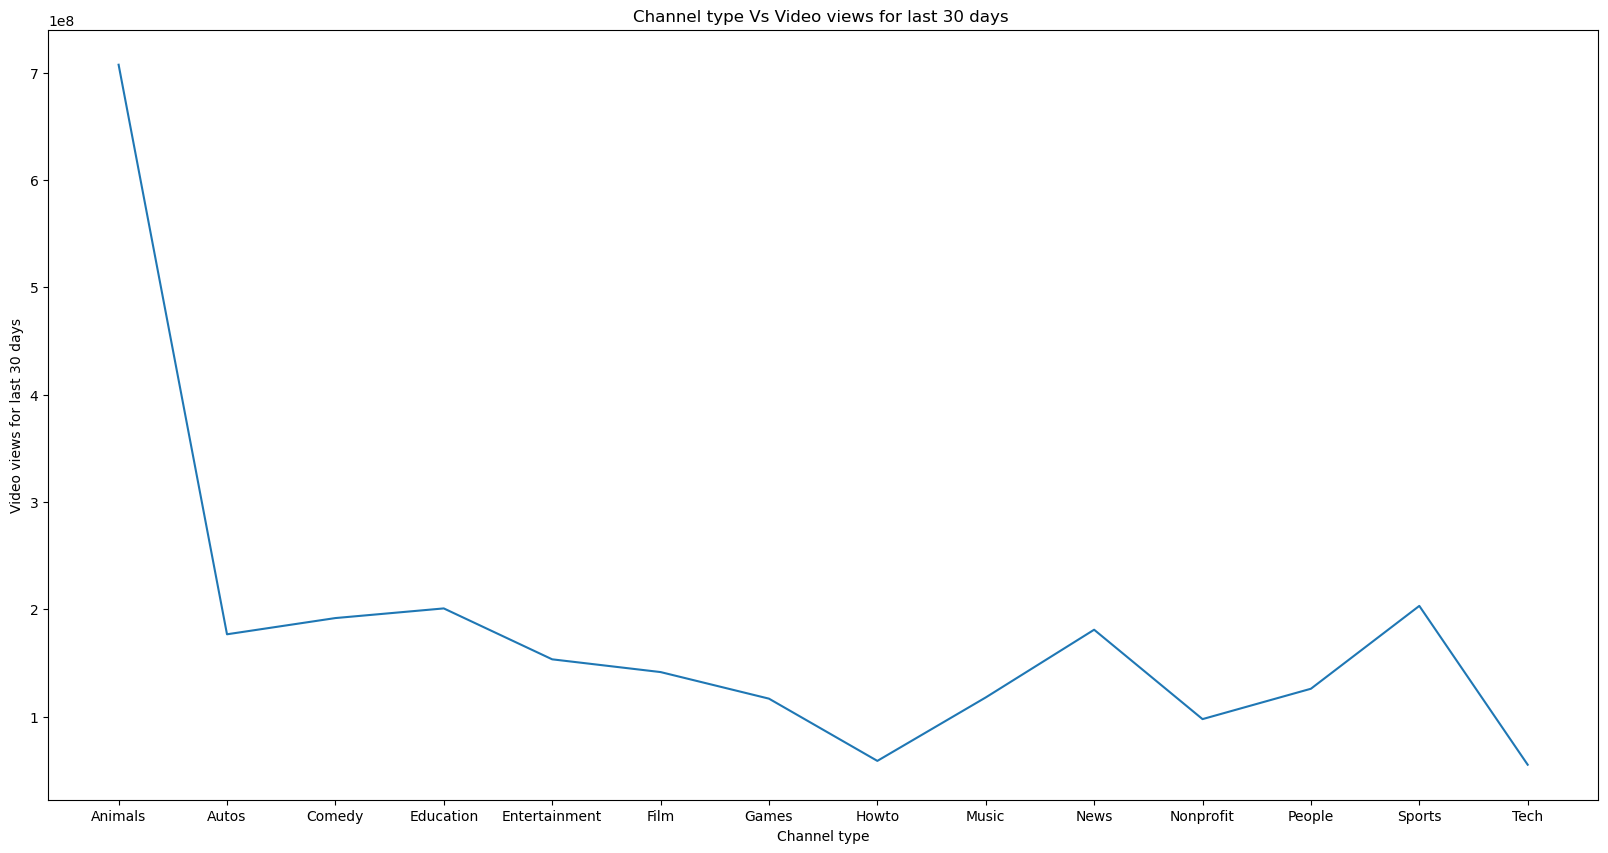

In [58]:
plt.figure(figsize=(20,10))
sns.lineplot(x='channel_type', y='video_views_for_the_last_30_days', data=group_channel_type_video_views)
plt.xlabel('Channel type')
plt.ylabel('Video views for last 30 days')
plt.title('Channel type Vs Video views for last 30 days ')
plt.show()

INFERENCE : It is inferred that channel type ‘Animals’ has the most views in the last 30 days followed by ‘Entertainment’ and ‘Sports’.

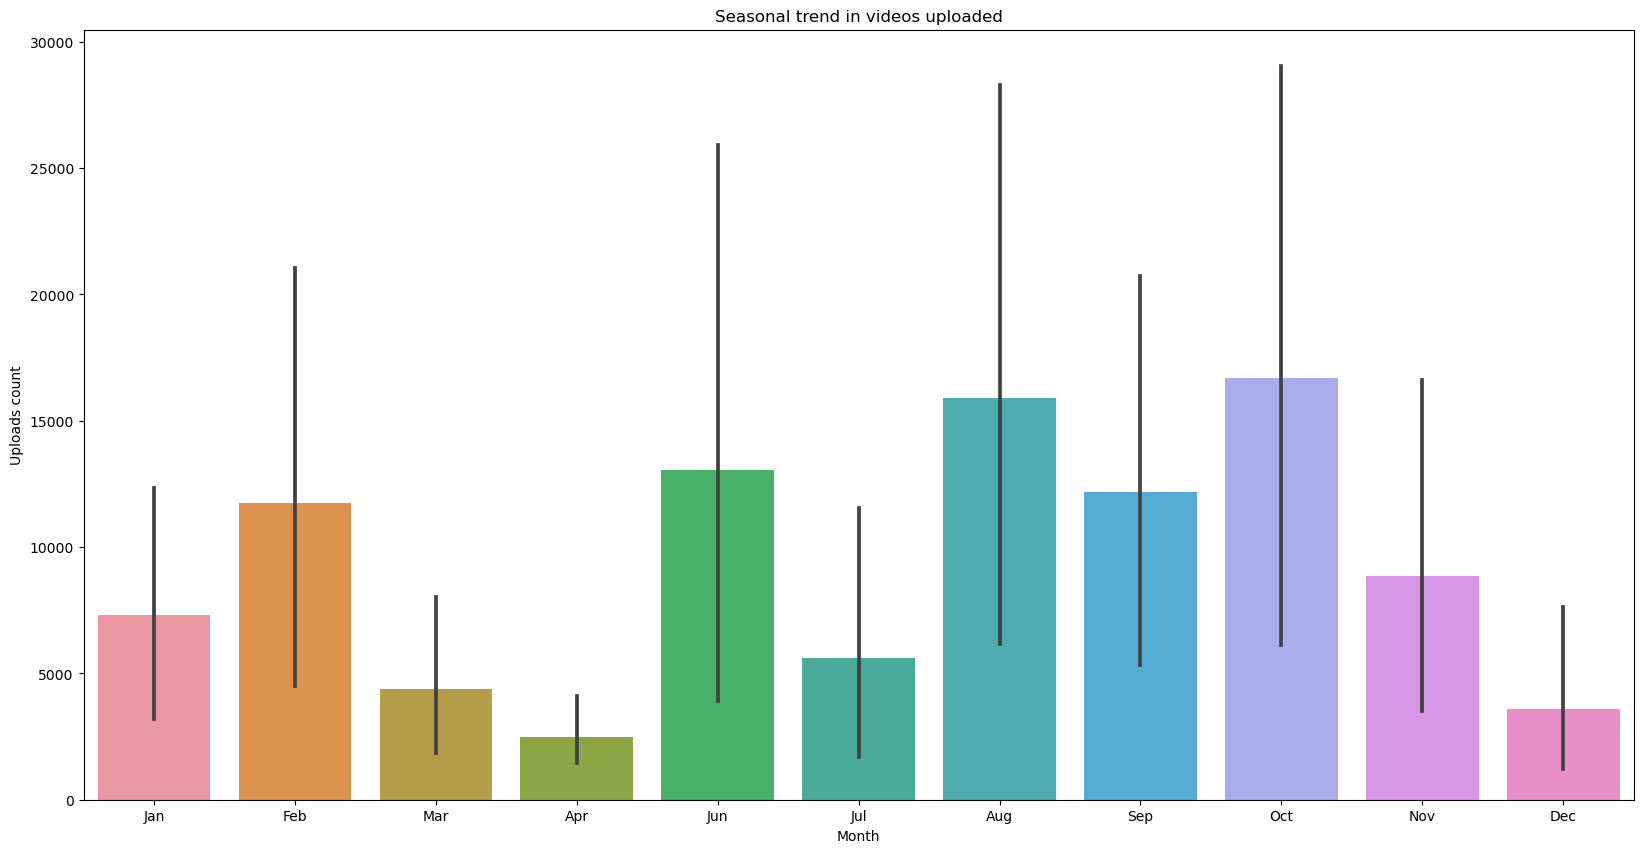

In [59]:
new_order_month=['Jan','Feb','Mar','Apr','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df['created_month'] = pd.Categorical(df['created_month'], categories=new_order_month)
plt.figure(figsize=(20,10))
sns.barplot(x='created_month', y='uploads', data=df)
plt.xlabel('Month')
plt.ylabel('Uploads count')
plt.title('Seasonal trend in videos uploaded')
plt.show()

INFERENCE : We can infer that more videos were uploaded in the month of October and August. 
We can also see that, as a whole, there are more videos uploaded in the second half of the season of an year.

In [60]:
year_avg_subscribers=df.groupby('created_year')['subscribers_for_last_30_days'].mean().reset_index()
df['created_year']=df['created_year'].astype('int')
print(year_avg_subscribers)

    created_year  subscribers_for_last_30_days
0           1970                 300000.000000
1           2005                 254013.791667
2           2006                 286565.989130
3           2007                 279677.019231
4           2008                 279415.630435
5           2009                 282515.788462
6           2010                 282065.166667
7           2011                 287023.195122
8           2012                 407064.279412
9           2013                 294718.987179
10          2014                 356580.730769
11          2015                 321139.109589
12          2016                 444757.076923
13          2017                 413075.382353
14          2018                 337919.500000
15          2019                 282265.352941
16          2020                 924959.566667
17          2021                 493514.130435
18          2022                 160008.600000


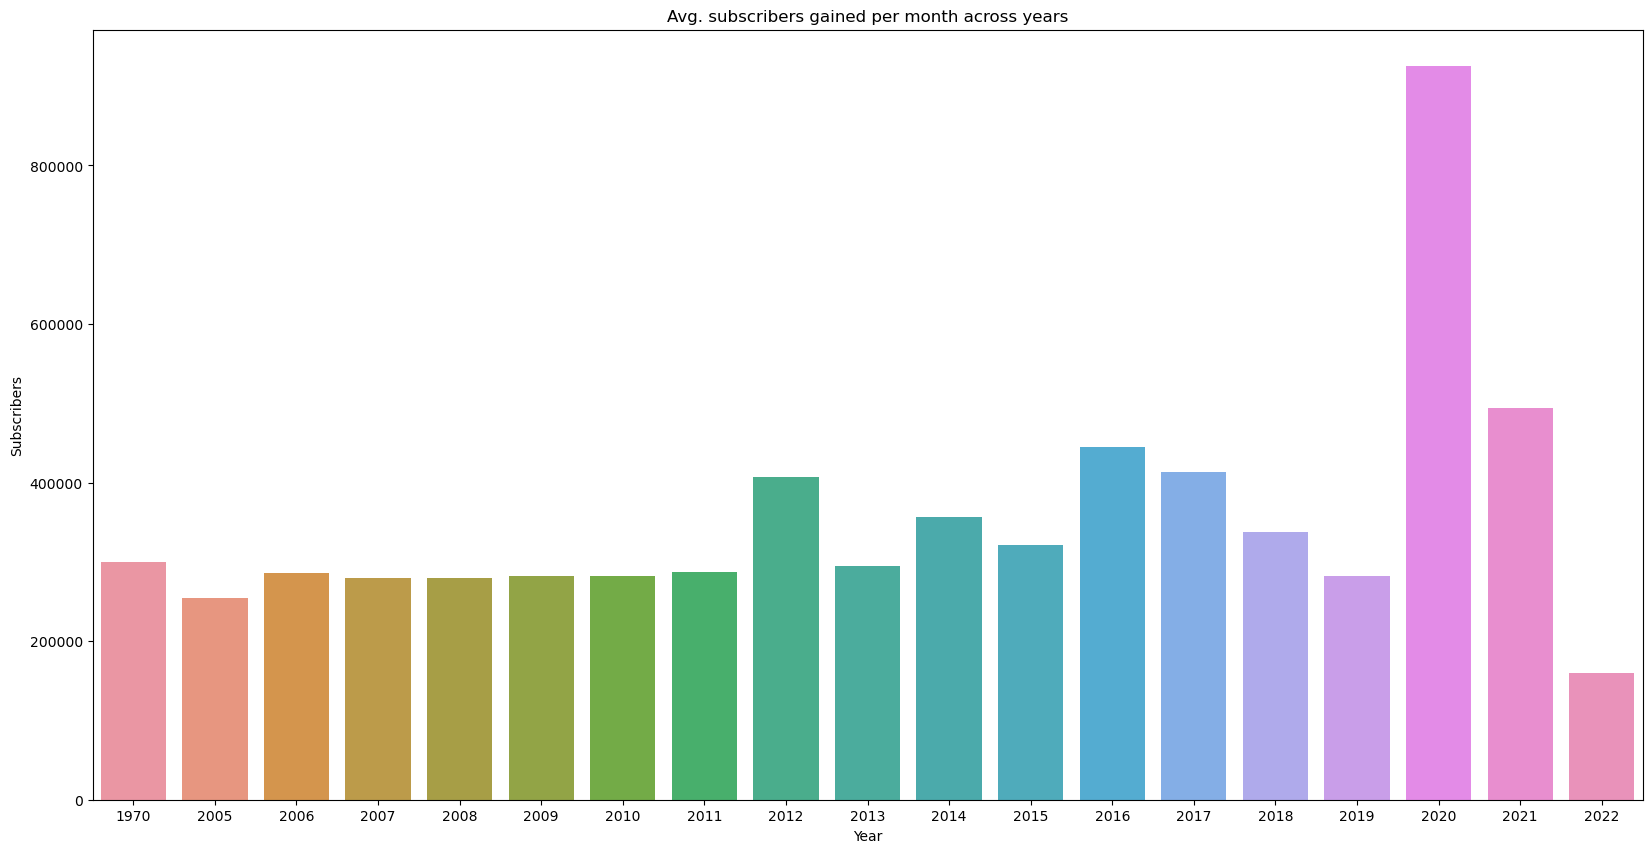

In [61]:
plt.figure(figsize=(20,10))
sns.barplot(x='created_year',y='subscribers_for_last_30_days', data=year_avg_subscribers)
plt.xlabel('Year')
plt.ylabel('Subscribers')
plt.title('Avg. subscribers gained per month across years')
plt.show()

INFERENCE : Hence we see that more subscribers were added in the year of 2020.This may give the conclusion that people were involved in watching  YouTube videos in spending their time mostly. 